# **ASSIGNMENT 14** #

## ***1. COMPANY DATA*** ##

File : Company_Data.csv

In [1]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree, preprocessing, metrics
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN


import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file Company_Data.csv** ###

In [2]:
# Reading the data from the file 'Company_Data.csv'
company_orig_data = pd.read_csv("Company_Data.csv")
company_orig_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

### **EDA (Exploratory Data Analysis)** ###

In [3]:
company_orig_data.shape

(400, 11)

#### *Descriptive Analysis* ####

In [4]:
company_orig_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
company_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### *Checking for missing values* ####

In [6]:
# check for missing values
company_orig_data.isna().sum() # The result shows that there are no missing values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### *Checking for Null Values* ####

In [7]:
# Checking to see if there are any null values
# We can get this information using company_orig_data.info() option as well
company_orig_data.isnull().sum() # The result shows that there are no null values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### *Checking for duplicates* ####

In [8]:
# Checking for Duplicate Values
company_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [9]:
# Count of duplicated rows
company_orig_data[company_orig_data.duplicated()].shape # We see that there are no duplicate

(0, 11)

In [10]:
# Print the duplicated rows. Since we have duplicates it will show us the record
company_orig_data[company_orig_data.duplicated()] # We don't find any duplicates

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

#### *Checking the data structure* ####

In [11]:
company_data = company_orig_data.copy() # Creating a replicate 'company_data' of the original DataFrame 'company_orig_data'

In [12]:
# Data Structure
print(type(company_data))
company_data.shape

<class 'pandas.core.frame.DataFrame'>


(400, 11)

In [13]:
# Checking data types
company_data.dtypes # check data types of all variables

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

#### *Feature Engineering - Creating a new Sales Categorical Column* ####

In [14]:
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

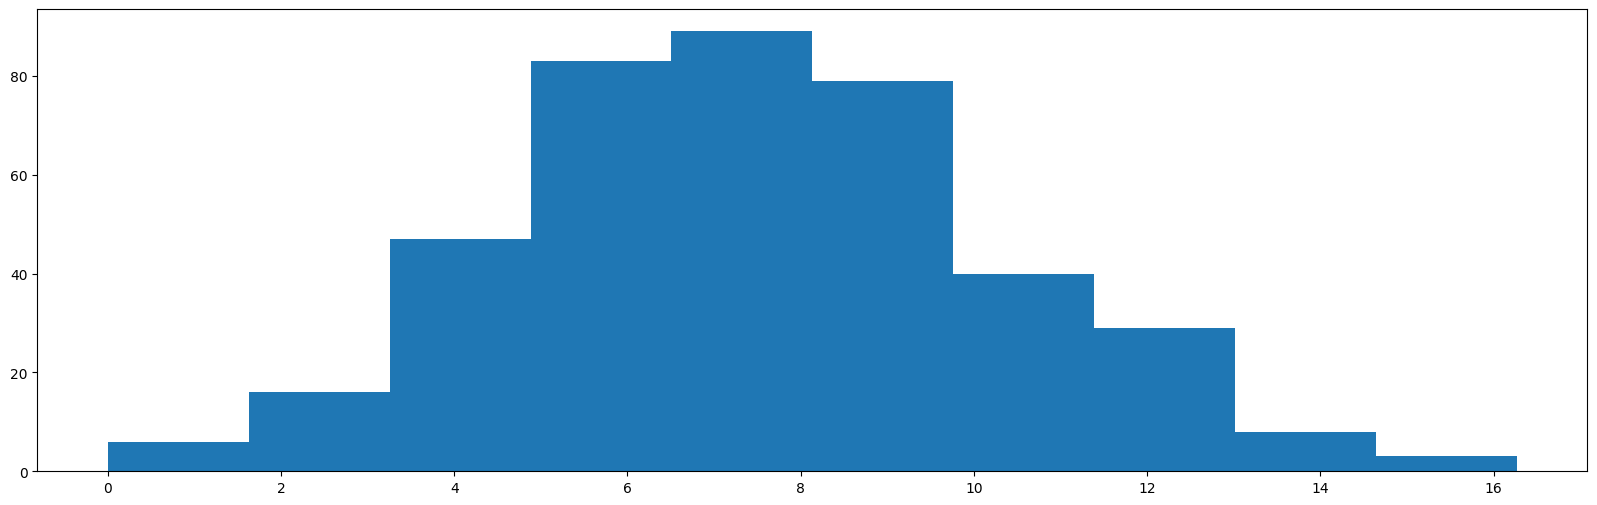

In [15]:
plt.figure(figsize=(20,6))
plt.hist('Sales',data=company_data)
plt.show()


*As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold*

- Since the highest sales is around 16, the middle will be around 8, so we can consider sales below 8 as **'Bad'** and above 8 as **'Good'**.
- Similarly for segregation of 3 categories, we will divide the highest sales by 3 and take the first 1/3rd part (in the left) as **'Low'**, the second 1/3rd part (in the middle) as **'Medium'** and the third 1/3rd (in the right) as **'high'**.

We will proceed with segregation into 3 parts i.e., 'High', 'Medium' and 'Low'.

In [16]:
max_sale = company_data.Sales.max()
max_sale

part_1 = max_sale/3
part_1

part_2 = part_1 * 2 #(as decided it is 2 * 1/3 ~ 2 * part_1)
part_2

part_3 = part_1 * 3 #(as decided it is 3 * 1/3 ~ 2 * part_1)
part_3

print(f"First Part: {part_1} ; Second Part: {part_2} ; Third Part: {part_3}")

First Part: 5.423333333333333 ; Second Part: 10.846666666666666 ; Third Part: 16.27


In [17]:
company_data['Sales_Categorized'] = pd.cut(x = company_data['Sales'], bins = [0,part_1,part_2,16.3], labels=['Low','Medium','High'], right = False)
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Categorized  
0         17   Yes  Yes            Medium  
1         10   Yes  Yes              High  
2         12   Yes  Yes            Medium  
3         14   Yes  Yes            Medium  
4         13   Yes   No               Low

In [18]:
company_data.Sales_Categorized.value_counts()

Sales_Categorized
Medium    247
Low       102
High       51
Name: count, dtype: int64

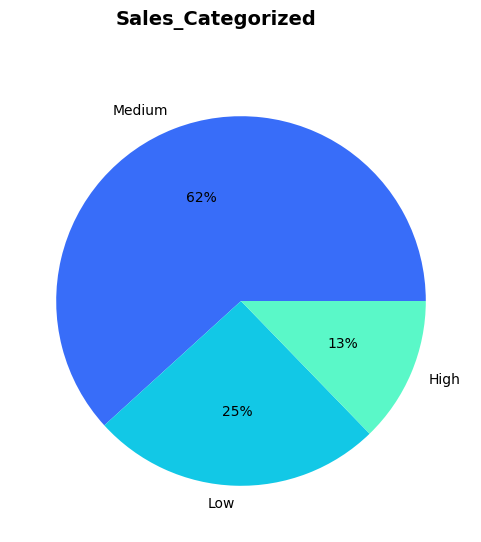

In [19]:
# Display state data in a form of Pie Graph
plt.figure(figsize=(20,6))
values = company_data['Sales_Categorized'].value_counts().keys().tolist()
counts = company_data['Sales_Categorized'].value_counts().tolist()
plt.pie(company_data['Sales_Categorized'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('Sales_Categorized', weight='bold').set_fontsize('14')

plt.show()

##### **INFERENCE:** #####
The **Target column is UnBalanced** i.e., 'Sales_Categorized' column is not evenly distributed or balanced with 'Medium' samples being the most i.e., 247 (62%), followed by 'Low' with 102 (25%) and lastly 'High' with 51 (13%)

#### ***Segregating the columns into Numeric and Non-Numeric*** ####

In [20]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sales              400 non-null    float64 
 1   CompPrice          400 non-null    int64   
 2   Income             400 non-null    int64   
 3   Advertising        400 non-null    int64   
 4   Population         400 non-null    int64   
 5   Price              400 non-null    int64   
 6   ShelveLoc          400 non-null    object  
 7   Age                400 non-null    int64   
 8   Education          400 non-null    int64   
 9   Urban              400 non-null    object  
 10  US                 400 non-null    object  
 11  Sales_Categorized  400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [21]:
categorical_cols = []
numeric_cols = []
for columns in company_data.columns:
      if ((company_data[columns].dtypes == 'object') or (company_data[columns].dtypes == 'category')):
            categorical_cols.append(columns)
            print(f"There are {len(company_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif ((company_data[columns].dtypes != 'object') and (company_data[columns].dtypes != 'category')):
            numeric_cols.append(columns)

print("\nThe categorical columns are: ",categorical_cols,"\n")
print("The numeric columns are: ",numeric_cols,"\n")

There are 3 unique values in the categorical column name 'ShelveLoc'
There are 2 unique values in the categorical column name 'Urban'
There are 2 unique values in the categorical column name 'US'
There are 3 unique values in the categorical column name 'Sales_Categorized'

The categorical columns are:  ['ShelveLoc', 'Urban', 'US', 'Sales_Categorized'] 

The numeric columns are:  ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



In [22]:
# Categorical variables
# For columns in company_data.columns:
# If company_data[columns].dtypes == 'object' or company_data[columns].dtypes == 'category':
for columns in company_data[categorical_cols].columns:
        unique_count = len(company_data[columns].unique())
        print("\n------------------------------------------")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n",company_data[columns].value_counts())


------------------------------------------
There are 3 unique columns in the column name 'ShelveLoc'

 ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'Urban'

 Urban
Yes    282
No     118
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'US'

 US
Yes    258
No     142
Name: count, dtype: int64

------------------------------------------
There are 3 unique columns in the column name 'Sales_Categorized'

 Sales_Categorized
Medium    247
Low       102
High       51
Name: count, dtype: int64


In [23]:
company_data[numeric_cols].head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education
0   9.50        138      73           11         276    120   42         17
1  11.22        111      48           16         260     83   65         10
2  10.06        113      35           10         269     80   59         12
3   7.40        117     100            4         466     97   55         14
4   4.15        141      64            3         340    128   38         13

In [24]:
company_data[categorical_cols].head()

ShelveLoc Urban   US Sales_Categorized
0       Bad   Yes  Yes            Medium
1      Good   Yes  Yes              High
2    Medium   Yes  Yes            Medium
3    Medium   Yes  Yes            Medium
4       Bad   Yes   No               Low

In [25]:
# Creating dataframes for both categorical data as well as numeric data
cat_comp_data = pd.DataFrame()
num_comp_data = pd.DataFrame()

cat_comp_data = company_data[categorical_cols]
num_comp_data = company_data[numeric_cols]

In [26]:
num_comp_data.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education
0   9.50        138      73           11         276    120   42         17
1  11.22        111      48           16         260     83   65         10
2  10.06        113      35           10         269     80   59         12
3   7.40        117     100            4         466     97   55         14
4   4.15        141      64            3         340    128   38         13

In [27]:
cat_comp_data.head()

ShelveLoc Urban   US Sales_Categorized
0       Bad   Yes  Yes            Medium
1      Good   Yes  Yes              High
2    Medium   Yes  Yes            Medium
3    Medium   Yes  Yes            Medium
4       Bad   Yes   No               Low

### **Visualizations** ###

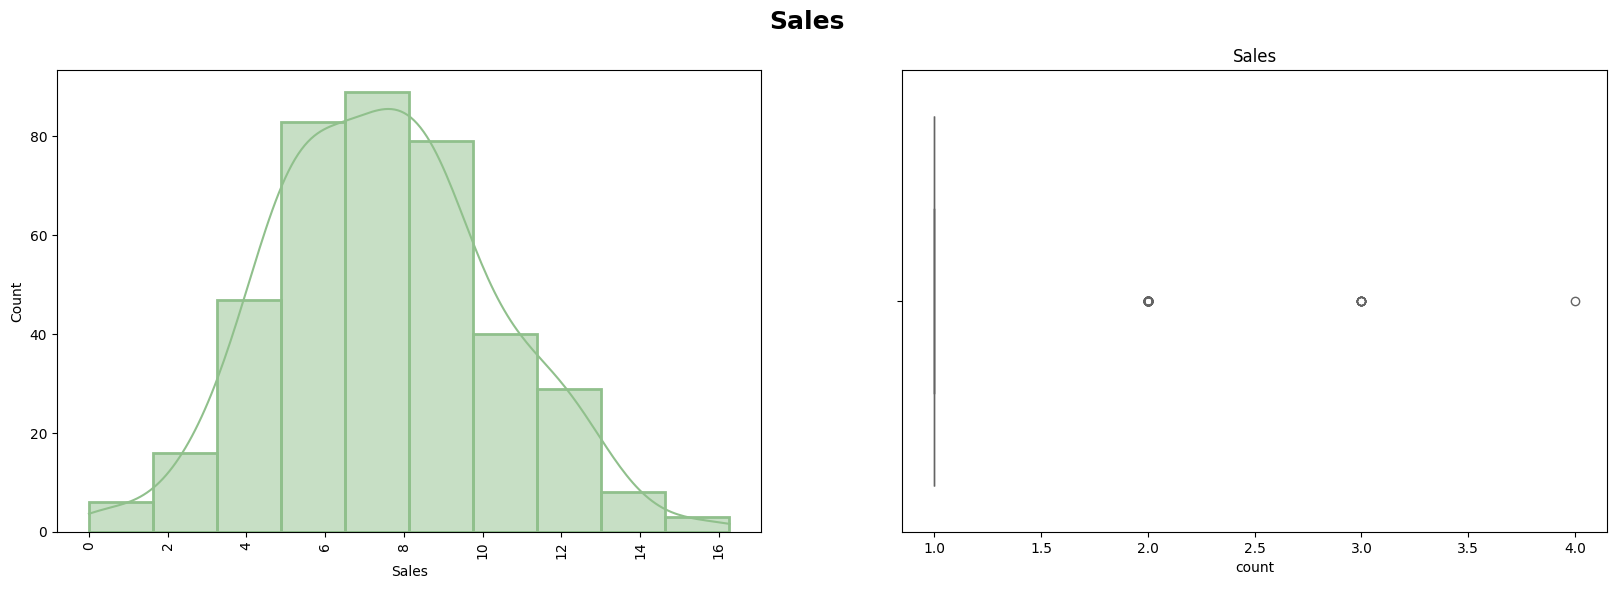

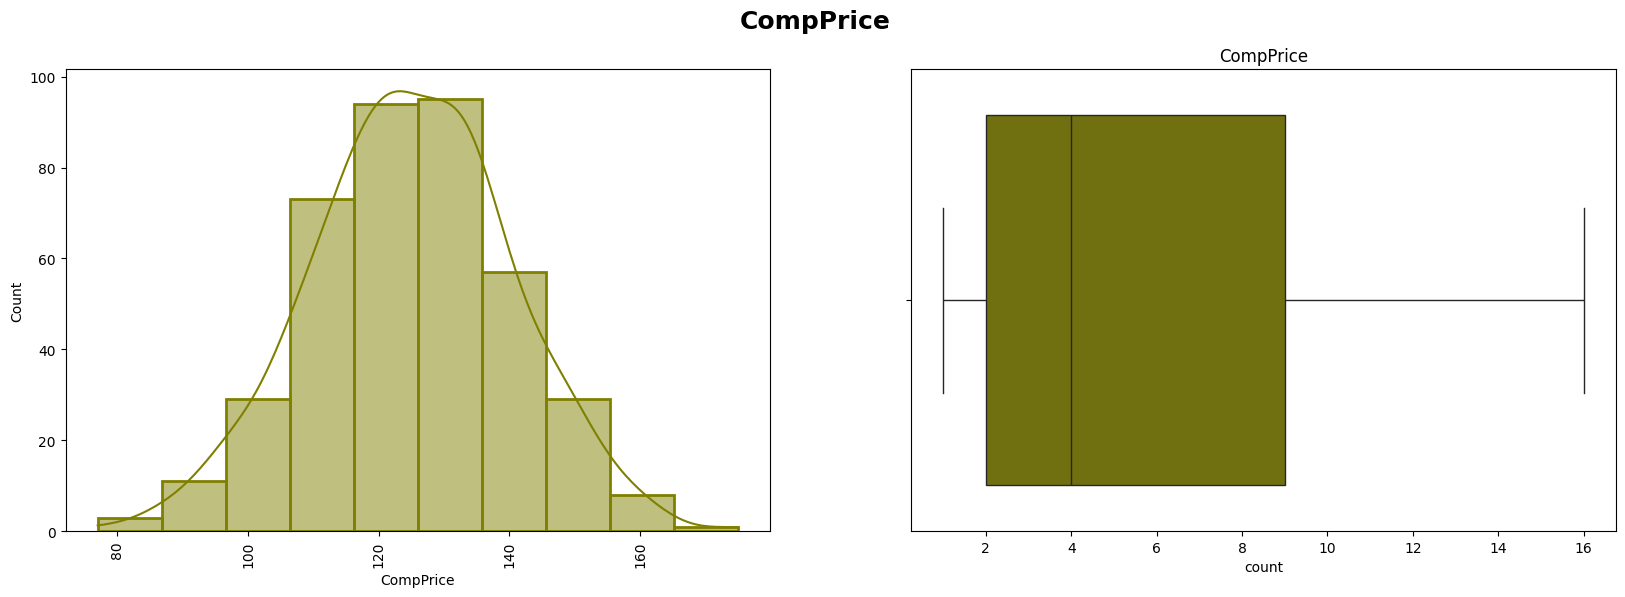

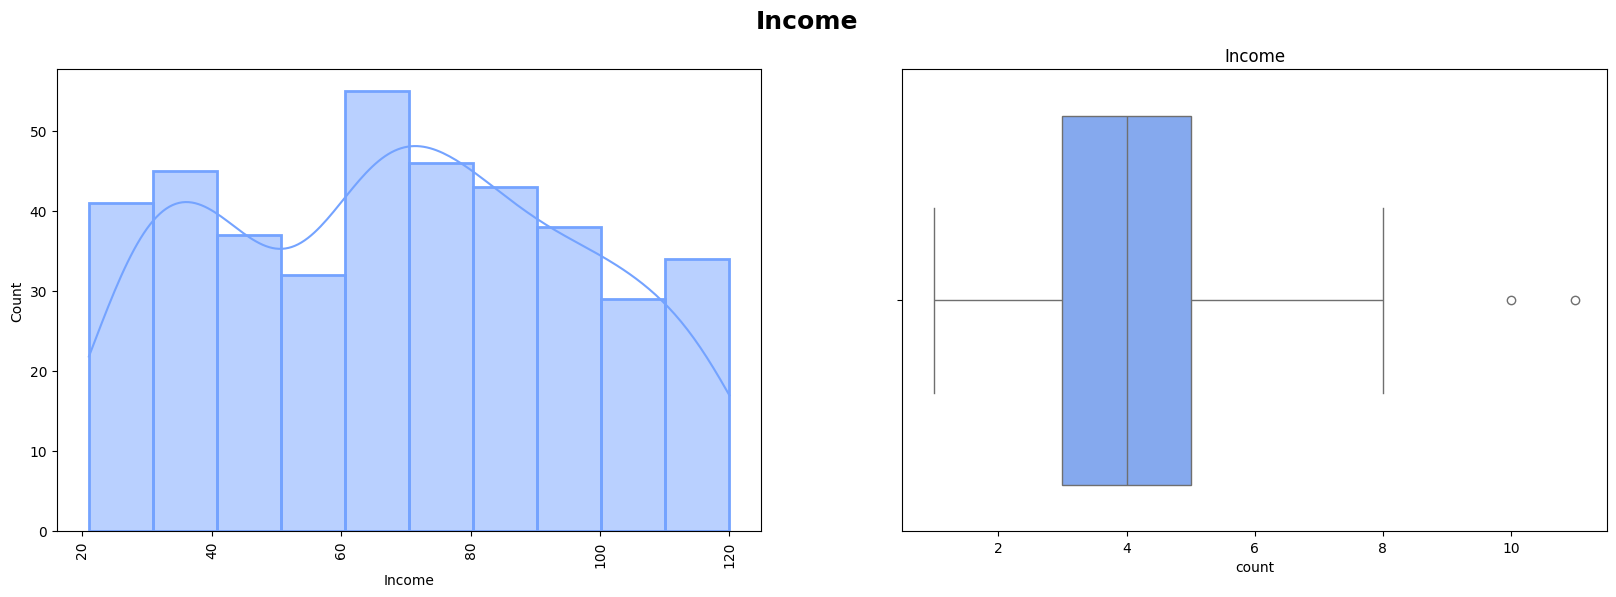

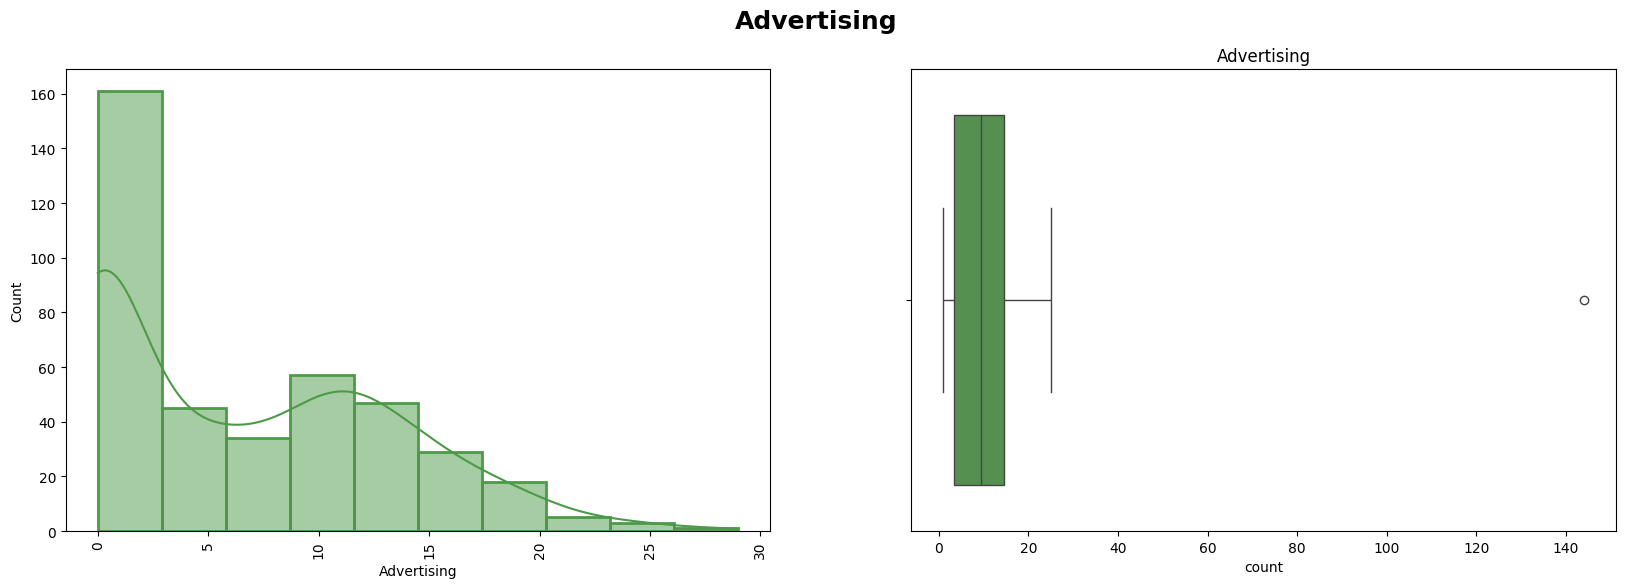

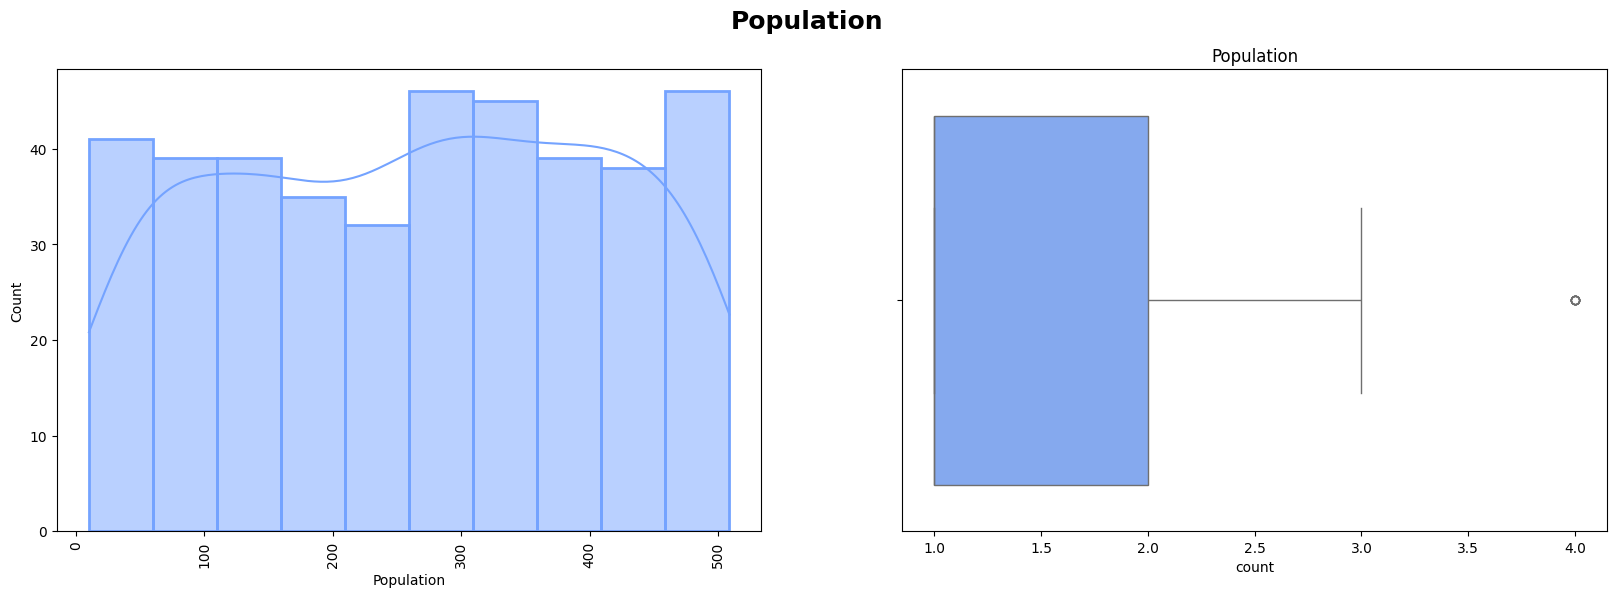

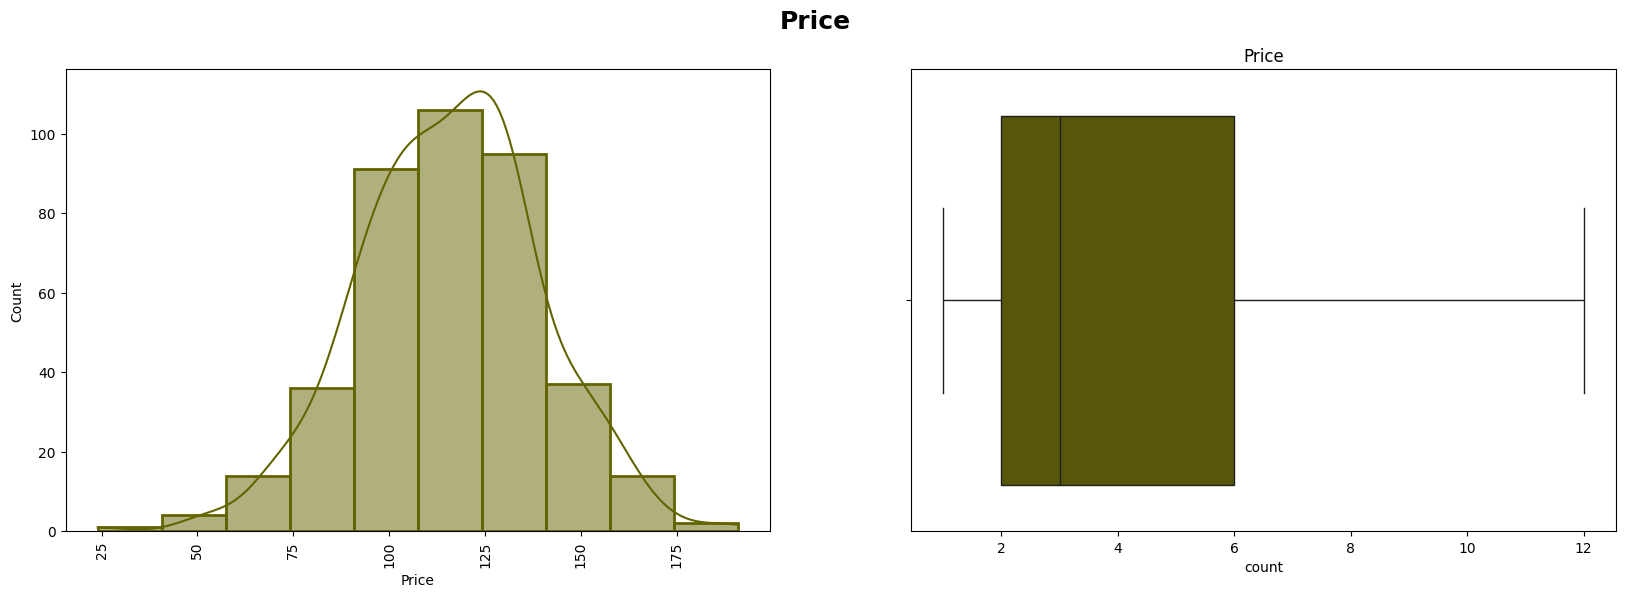

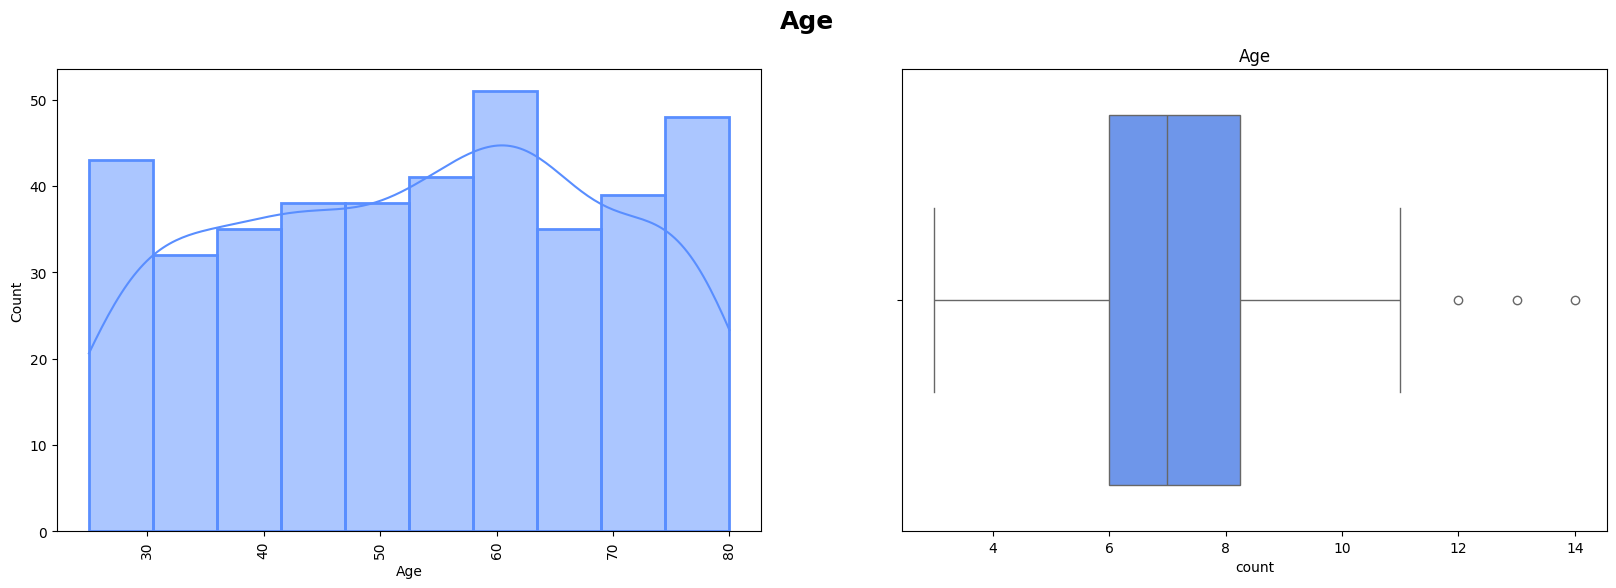

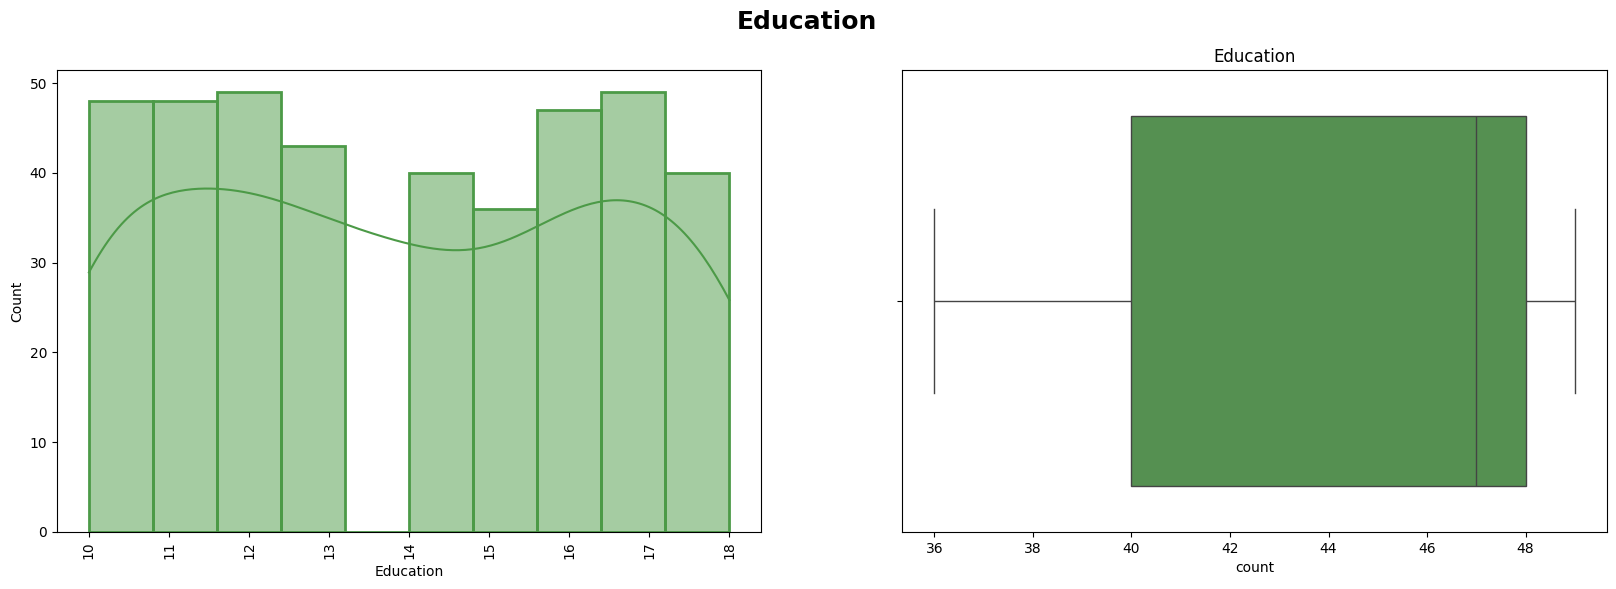

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.suptitle(feature, weight='bold').set_fontsize('18')

for n_cols in num_comp_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(num_comp_data,n_cols)
    plt.title(n_cols)

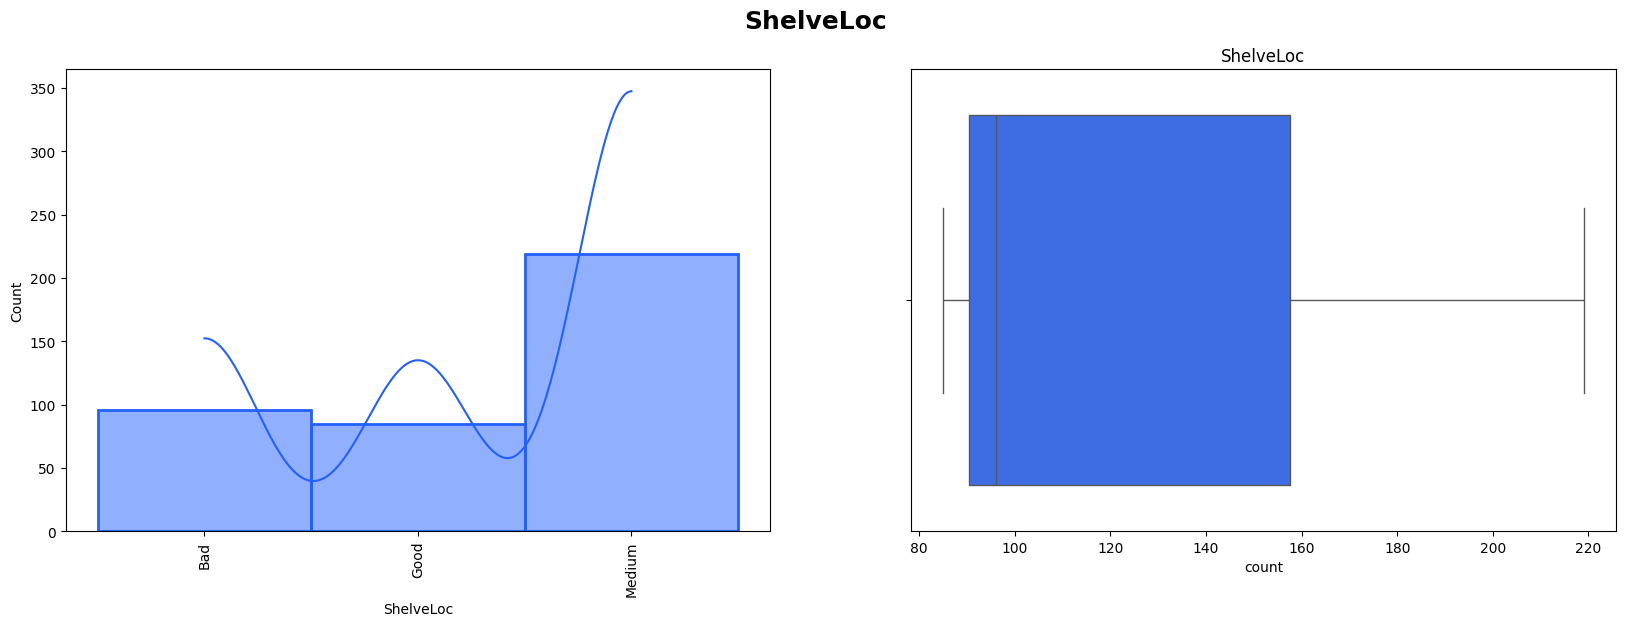

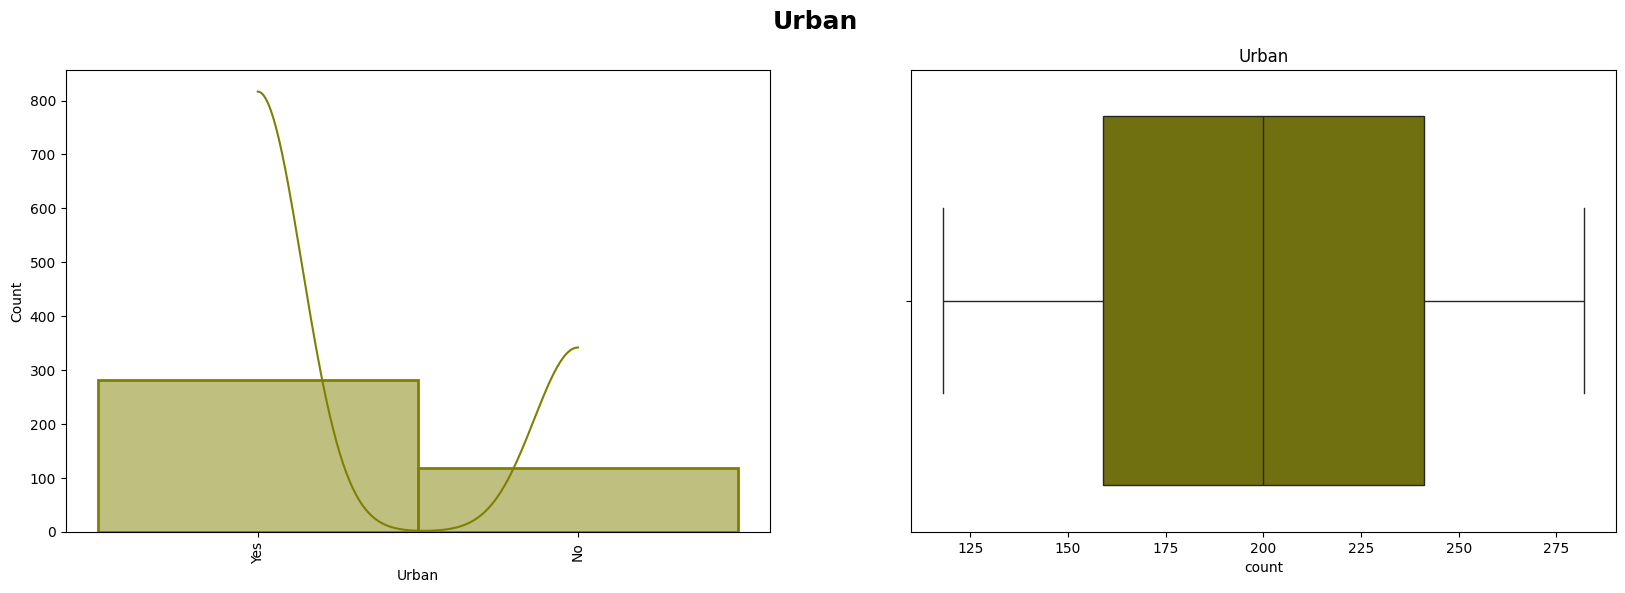

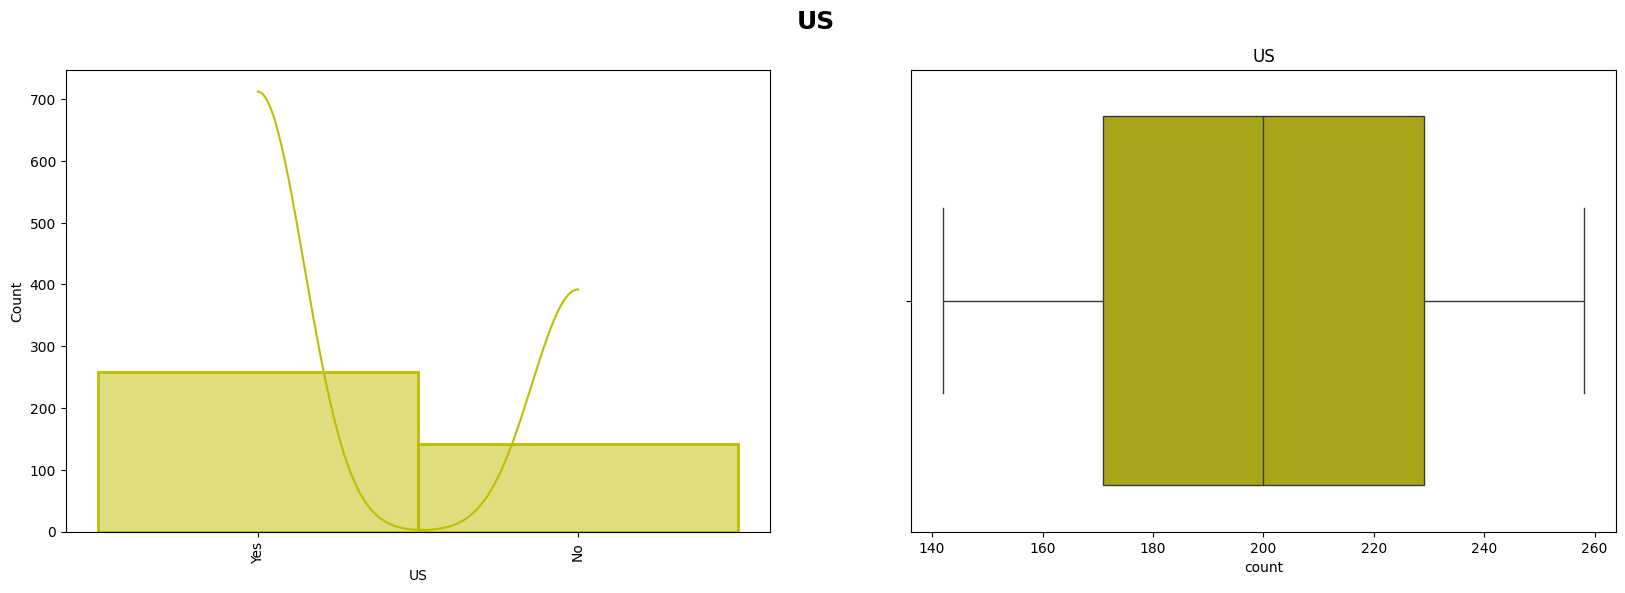

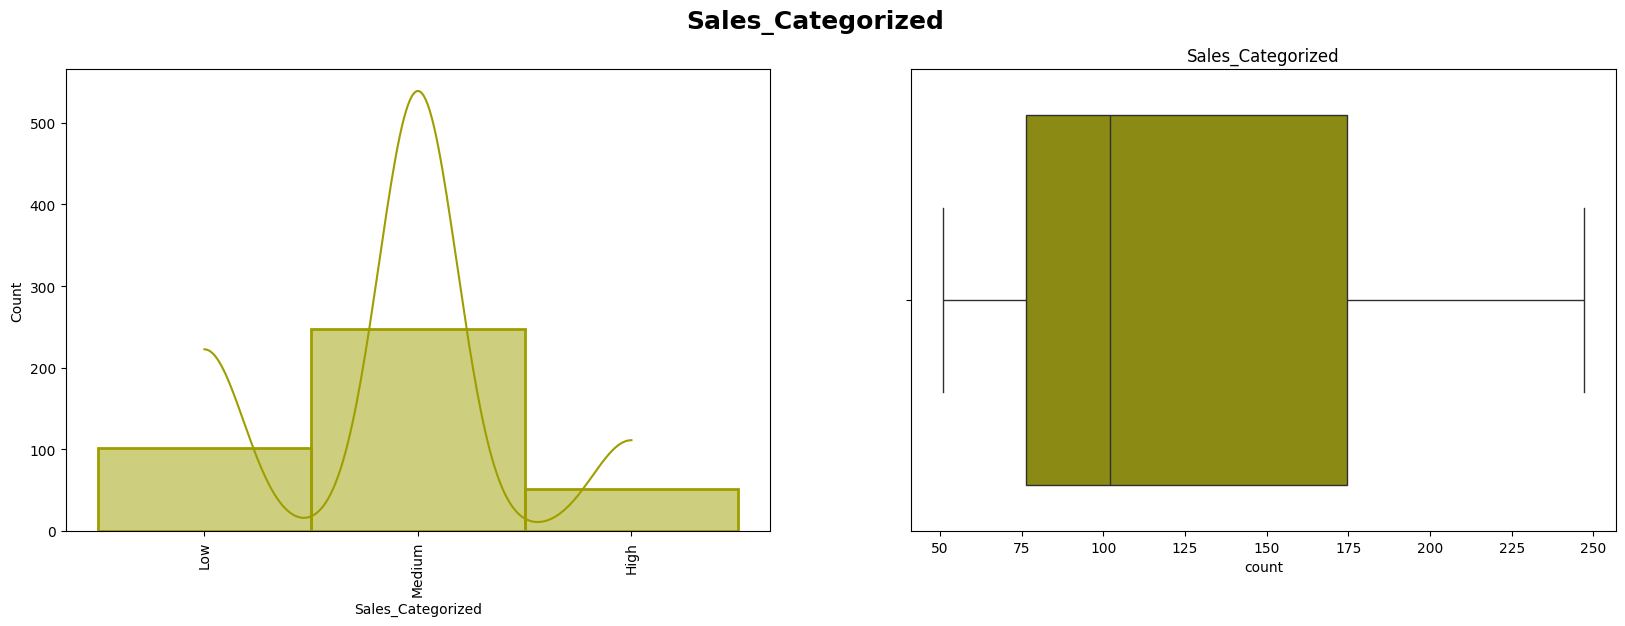

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.suptitle(feature, weight='bold').set_fontsize('18')

for c_cols in cat_comp_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(cat_comp_data,c_cols)
    plt.title(c_cols)

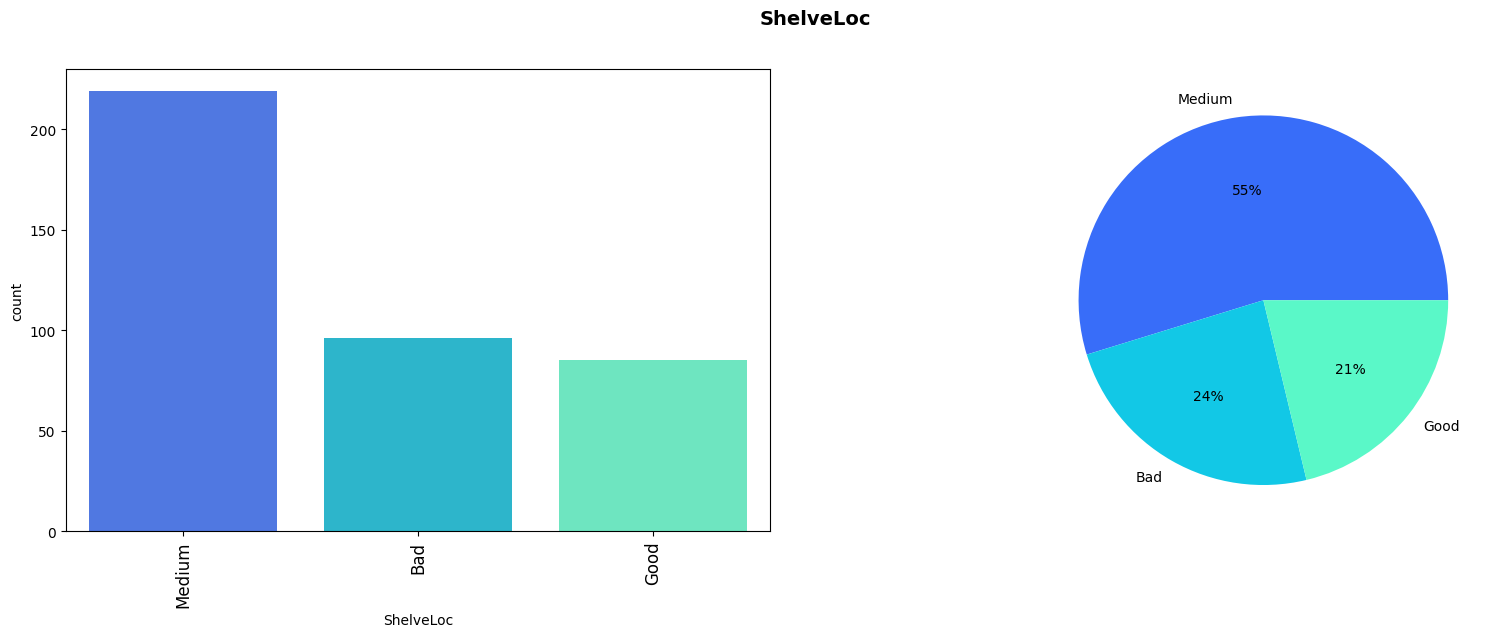

In [30]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='ShelveLoc', data=cat_comp_data, palette = palette_color, order=cat_comp_data['ShelveLoc'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_comp_data['ShelveLoc'].value_counts().keys().tolist()
counts = cat_comp_data['ShelveLoc'].value_counts().tolist()
plt.pie(cat_comp_data['ShelveLoc'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('ShelveLoc', weight='bold').set_fontsize('14')

plt.show()

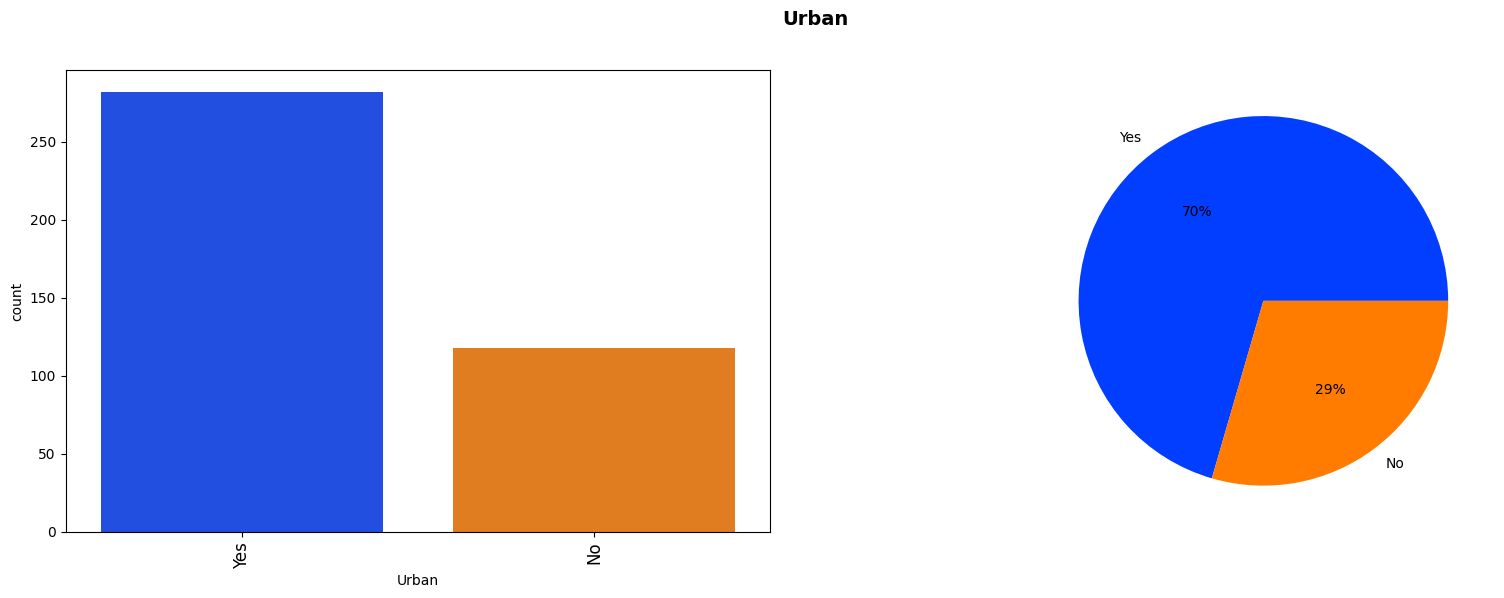

In [31]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='Urban', data=cat_comp_data, palette = palette_color, order=cat_comp_data['Urban'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_comp_data['Urban'].value_counts().keys().tolist()
counts = cat_comp_data['Urban'].value_counts().tolist()
plt.pie(cat_comp_data['Urban'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('Urban', weight='bold').set_fontsize('14')

plt.show()

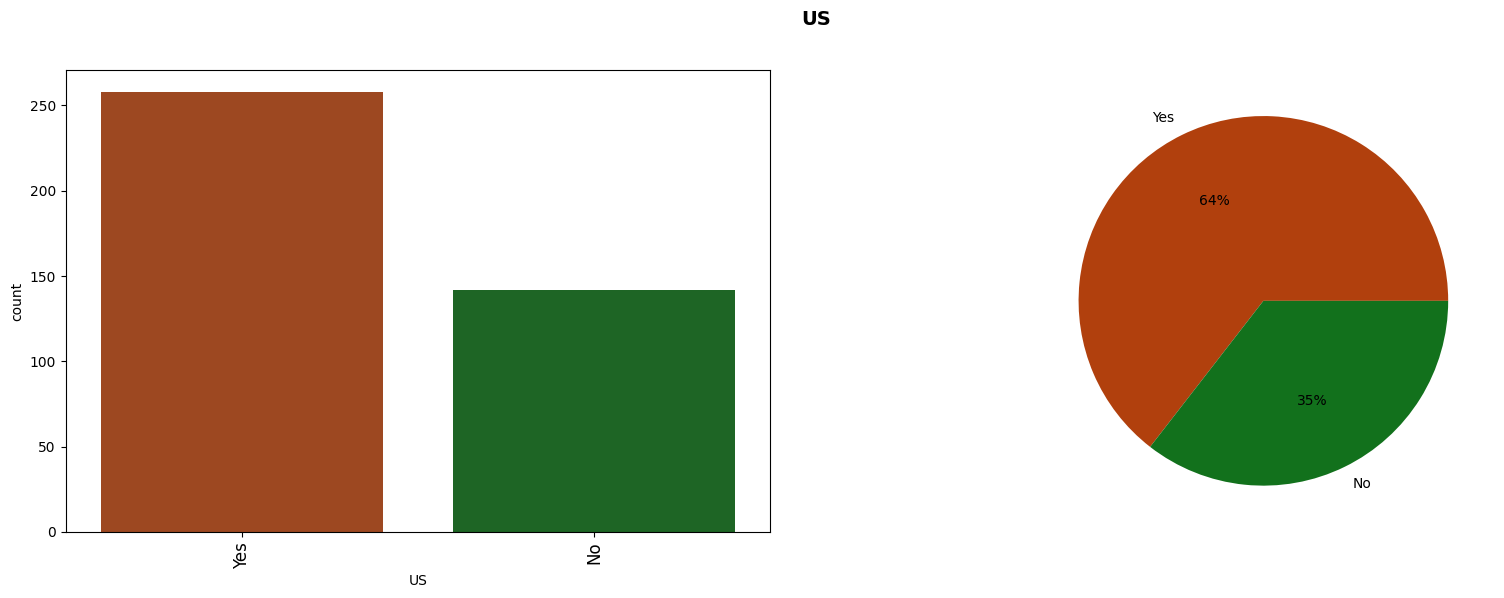

In [32]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('dark')[1:5]
sns.countplot(x='US', data=cat_comp_data, palette = palette_color, order=cat_comp_data['US'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_comp_data['US'].value_counts().keys().tolist()
counts = cat_comp_data['US'].value_counts().tolist()
plt.pie(cat_comp_data['US'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('US', weight='bold').set_fontsize('14')

plt.show()

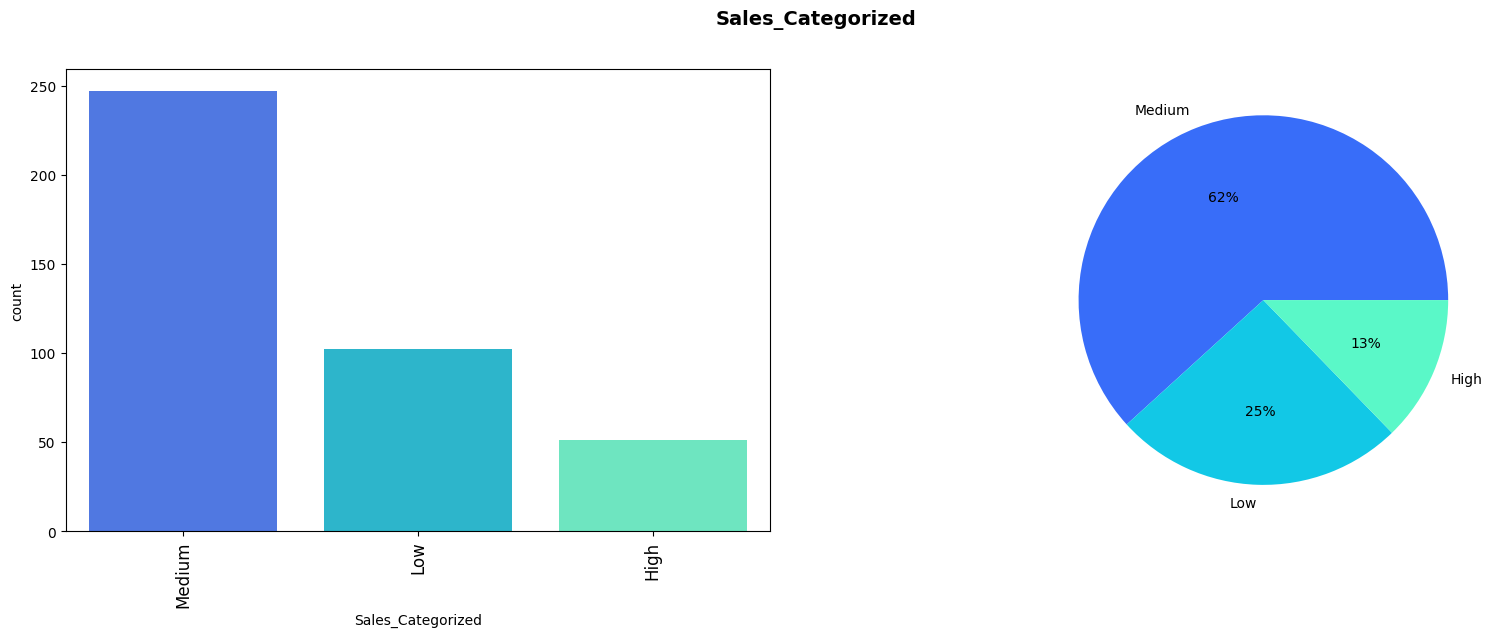

In [33]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='Sales_Categorized', data=cat_comp_data, palette = palette_color, order=cat_comp_data['Sales_Categorized'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_comp_data['Sales_Categorized'].value_counts().keys().tolist()
counts = cat_comp_data['Sales_Categorized'].value_counts().tolist()
plt.pie(cat_comp_data['Sales_Categorized'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('Sales_Categorized', weight='bold').set_fontsize('14')

plt.show()

### **Label Encoding** ###

In [34]:
comp_data = company_data.copy()

In [35]:
comp_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Categorized  
0         17   Yes  Yes            Medium  
1         10   Yes  Yes              High  
2         12   Yes  Yes            Medium  
3         14   Yes  Yes            Medium  
4         13   Yes   No               Low

In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in cat_comp_data:
  comp_data[str(col) + "_n"]= label_encoder.fit_transform(comp_data[col])

In [37]:
# Changing the number of rows to be displayed in a DataFrame
#pd.set_option('display.max_rows', 10)  # Display up to 10 rows
#pd.set_option('display.max_rows', None)  # Show all rows

##### *The Column data for the Categorical columns is decoded by LabelEncoder in the following way:* #####
| **Column Name** | **1st Category** | **2nd Category** | **3rd Category** |
| --- | --- | --- | --- |
| **ShelveLoc_n** | 0 - Bad | 1 - Good | 2 - Medium |
| **Urban_n** | 0 - No | 1 - Yes | |  
| **US_n** | 0 - No | 1 - Yes | |
| **Sales_Categorized_n** | 0 - High | 1 - Low |2 - Medium | 

In [38]:
comp_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Categorized  ShelveLoc_n  Urban_n  US_n  \
0         17   Yes  Yes            Medium            0        1     1   
1         10   Yes  Yes              High            1        1     1   
2         12   Yes  Yes            Medium            2        1     1   
3         14   Yes  Yes            Medium            2        1     1   
4         13   Yes   No               Low            0        1     0   

   Sales_Categorized_n  
0                    2  
1                    0  
2                    2  
3                    2  
4                    1

In [39]:
comp_data = comp_data.drop(['Sales', 'ShelveLoc','Urban', 'US', 'Sales_Categorized'], axis = 'columns')
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [40]:
# After decoded the data we can now only consider the label encoded columns and not the categorical columns and also exclude the target column 'Sales_Categorized_n'
inputs_comp = comp_data.drop(['Sales_Categorized_n'], axis = 'columns')
inputs_comp

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  
0              0        1     1  
1              1        1     1  
2              2        1     1  
3              2        1     1  
4              0        1     0  
..           ...      ...   ...  
395            1        1     1  
396            2        0     1  
397            2        1     1  
398            0        1     1  
399            1        1     1  

[400 rows x 10 columns]

In [41]:
target_comp = comp_data['Sales_Categorized_n']
target_comp.head()

0    2
1    0
2    2
3    2
4    1
Name: Sales_Categorized_n, dtype: int32

In [42]:
comp_data2 = pd.concat([comp_data, company_data['Sales']], axis=1, join='inner')

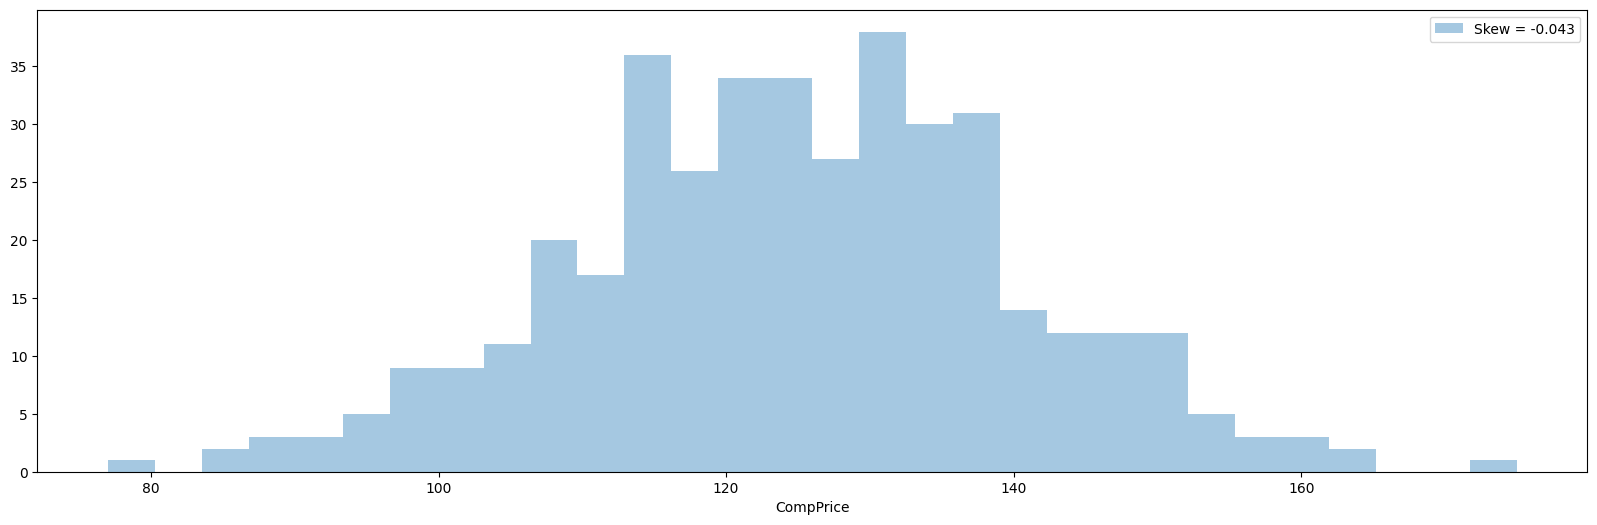

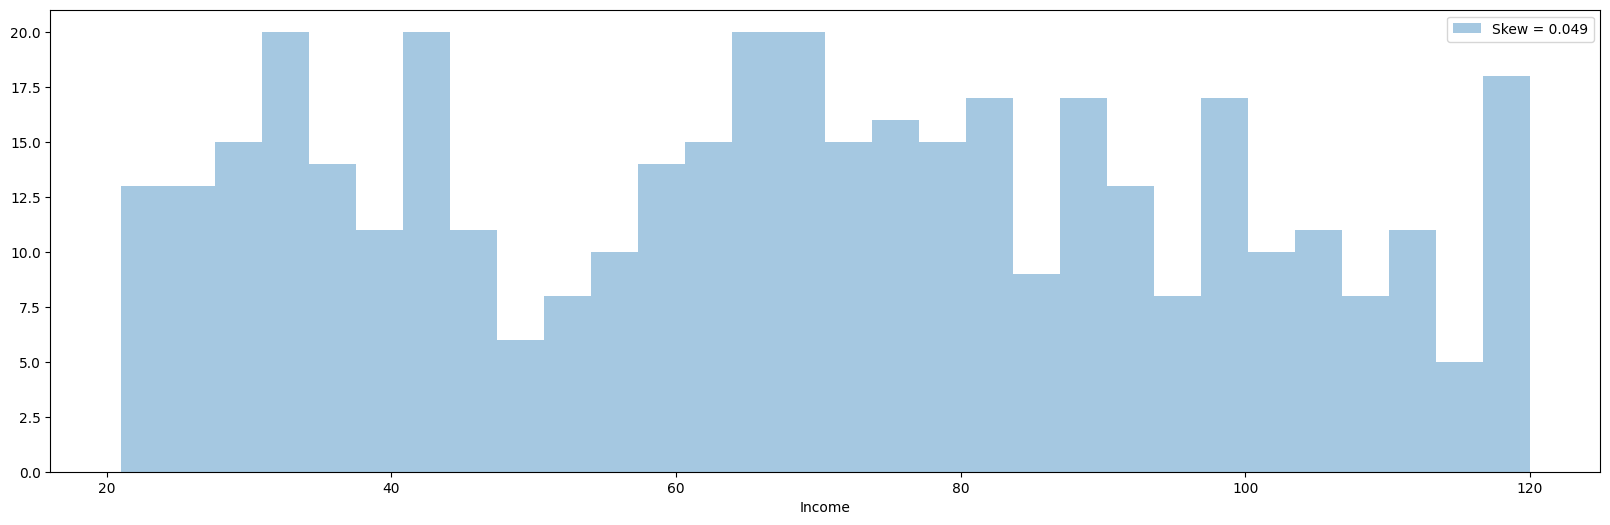

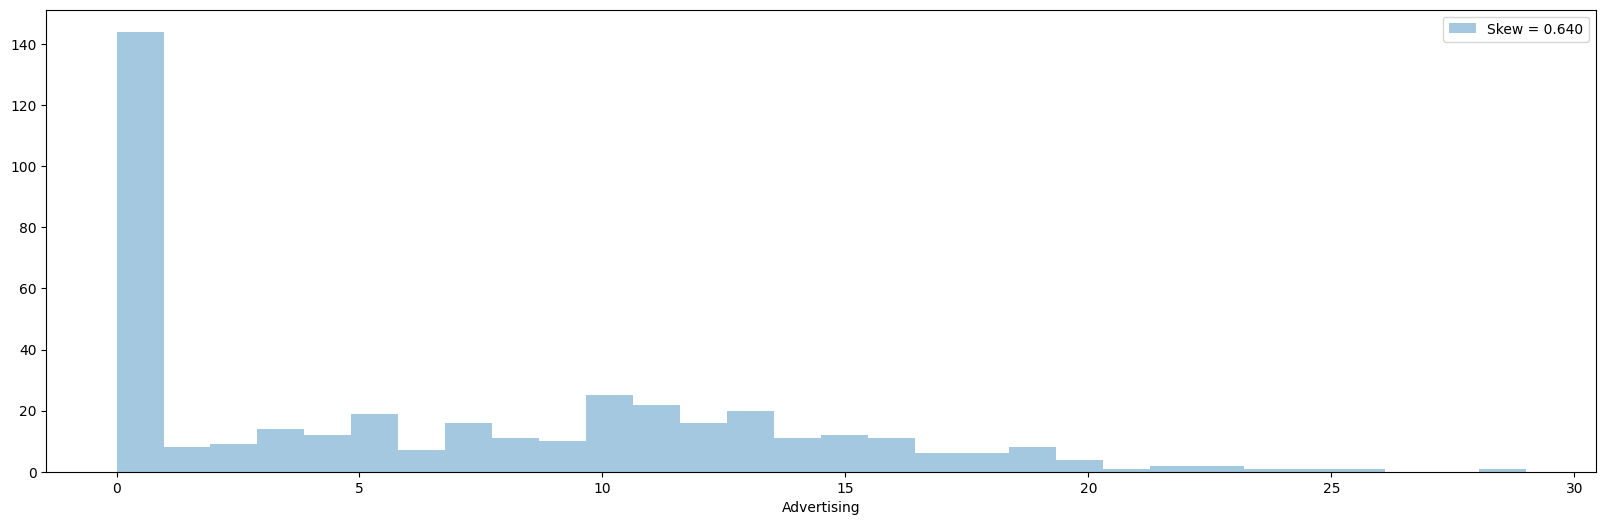

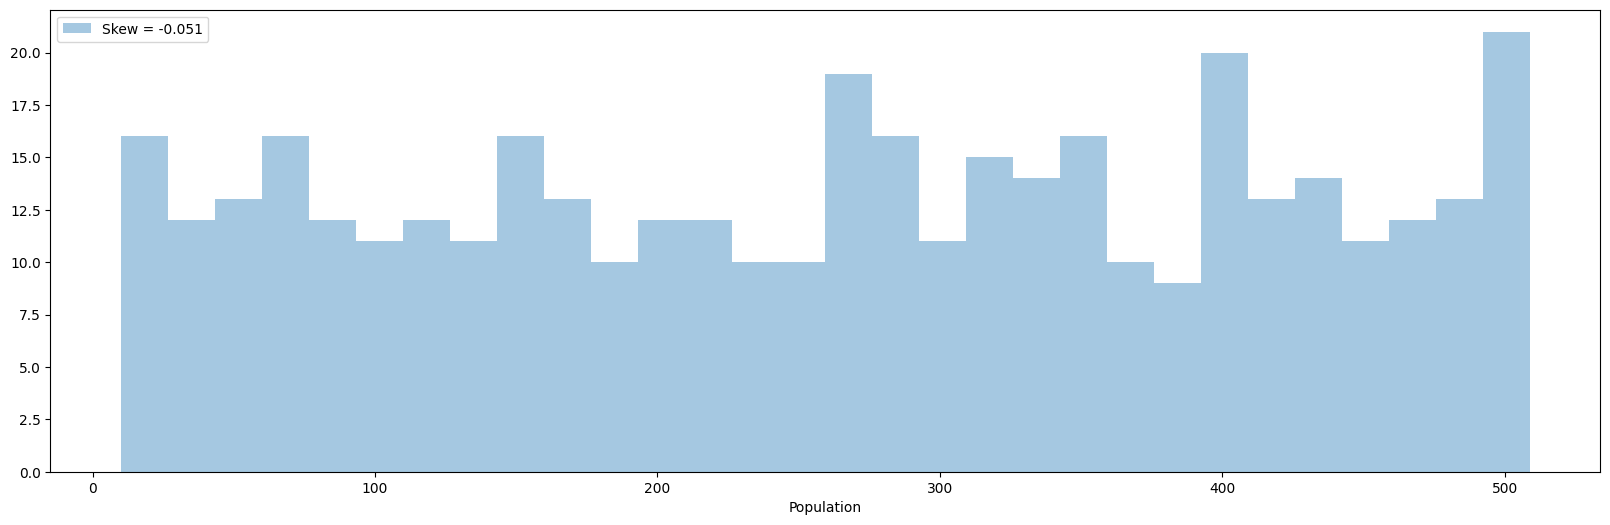

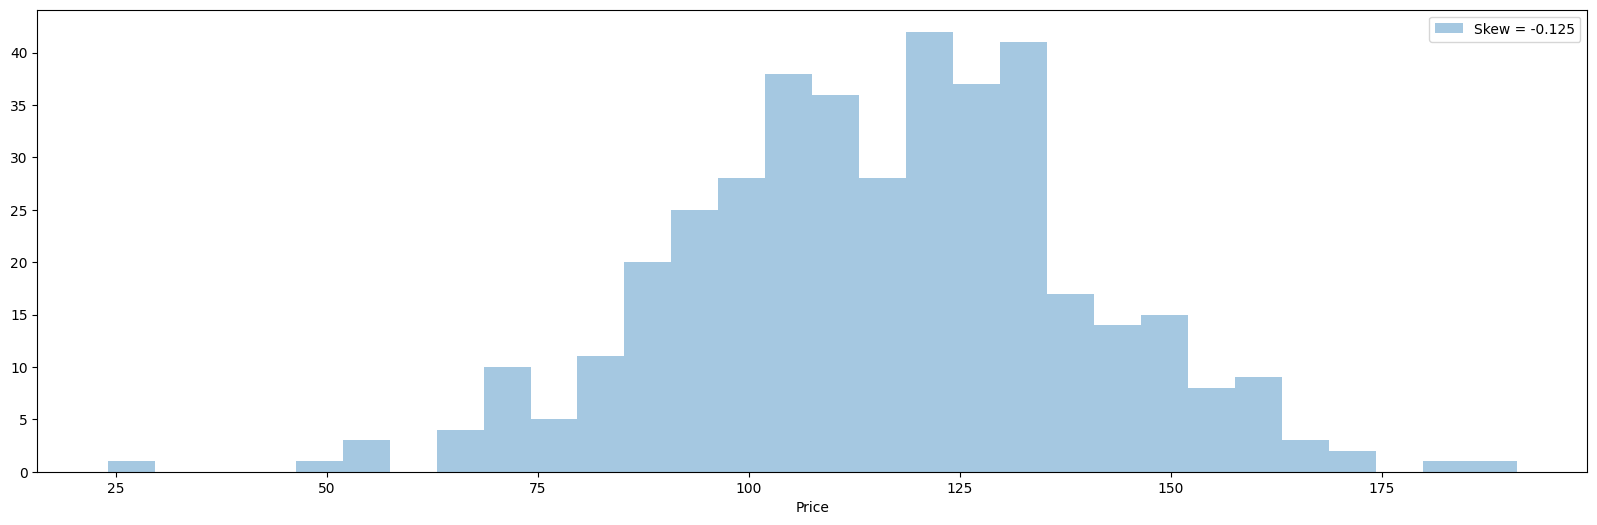

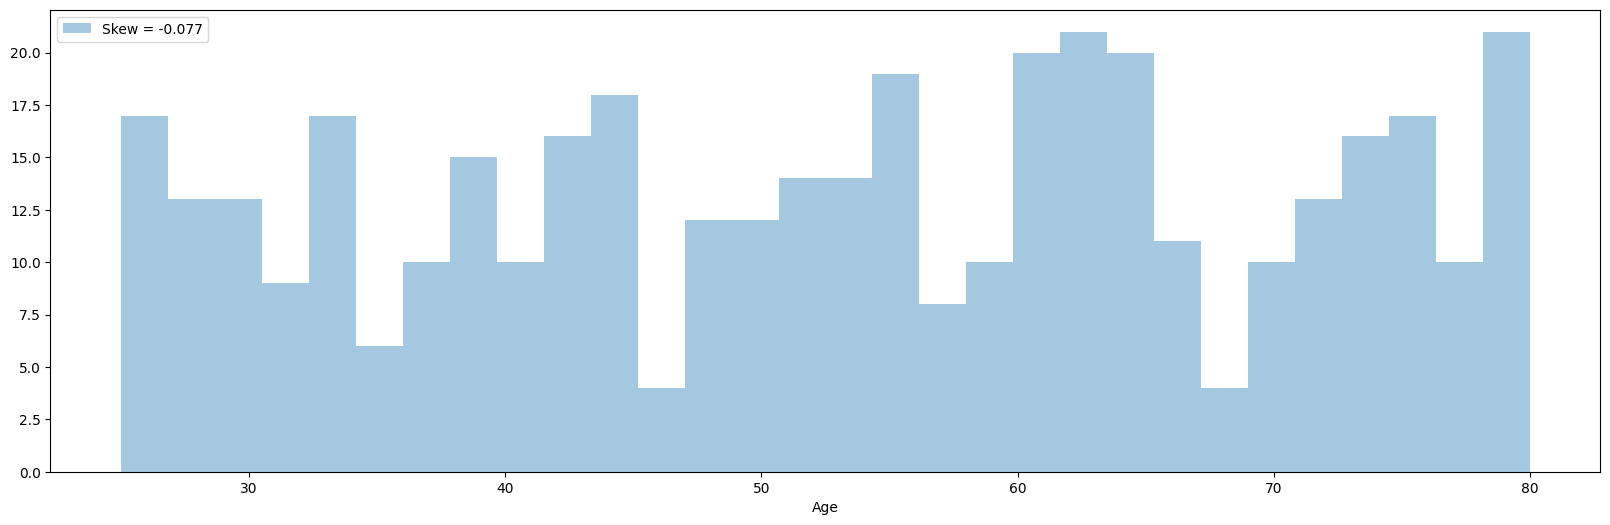

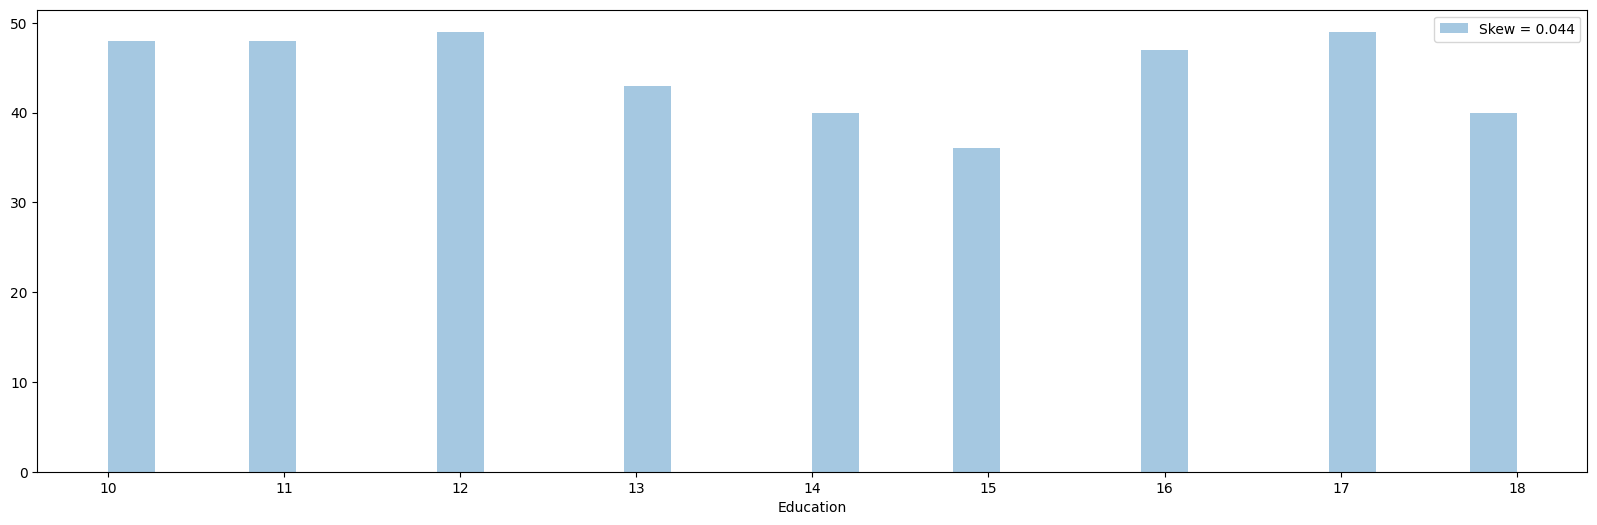

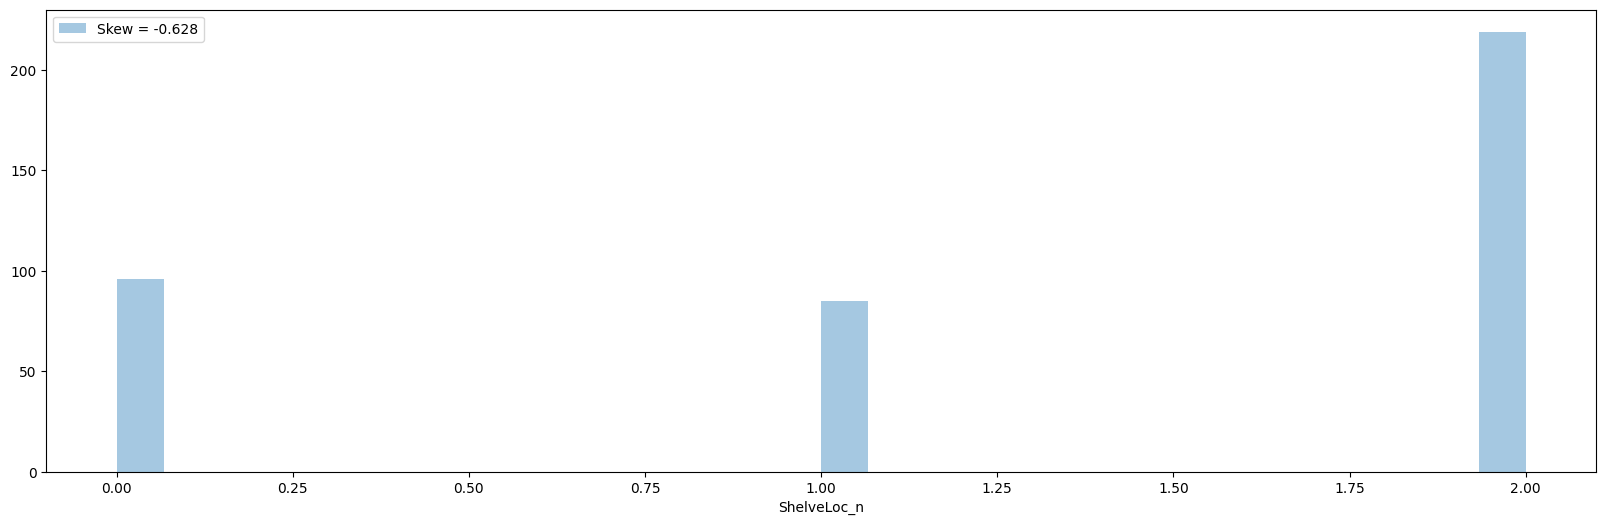

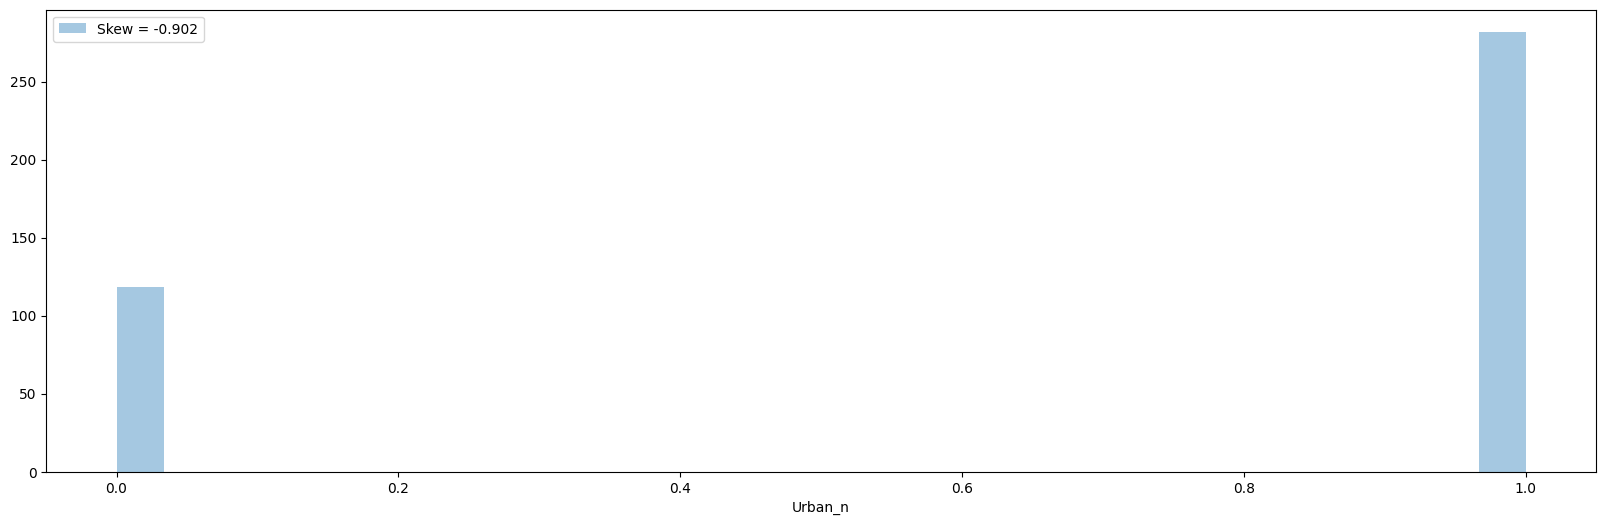

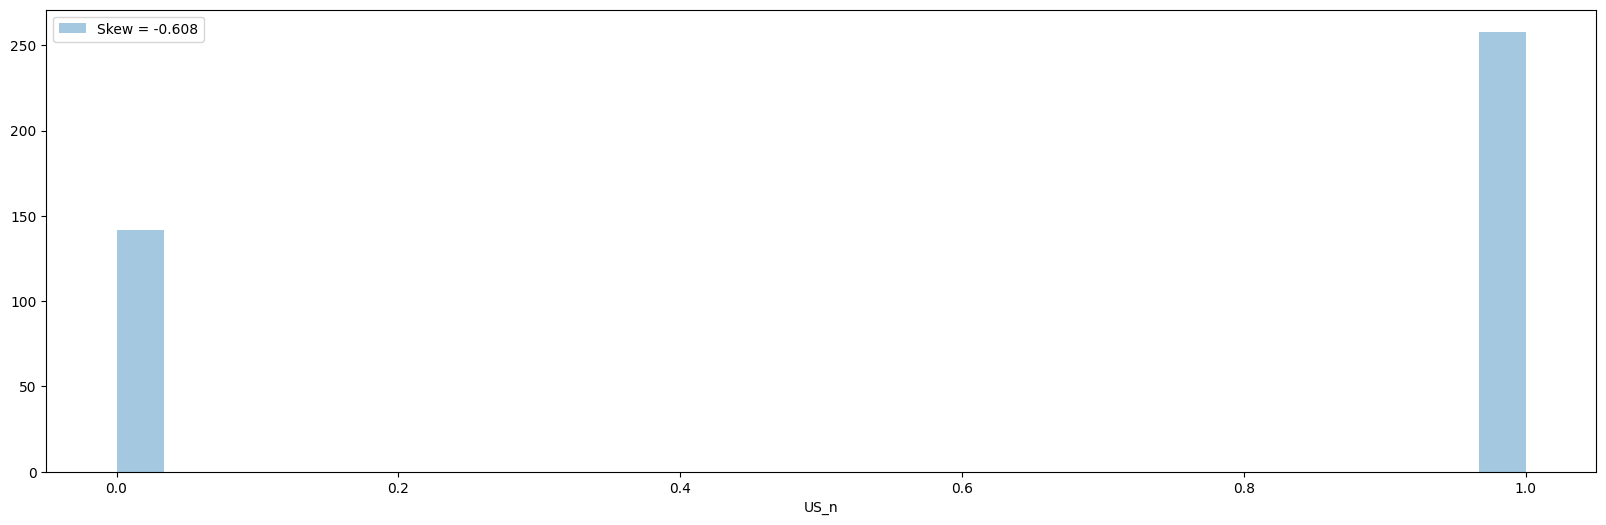

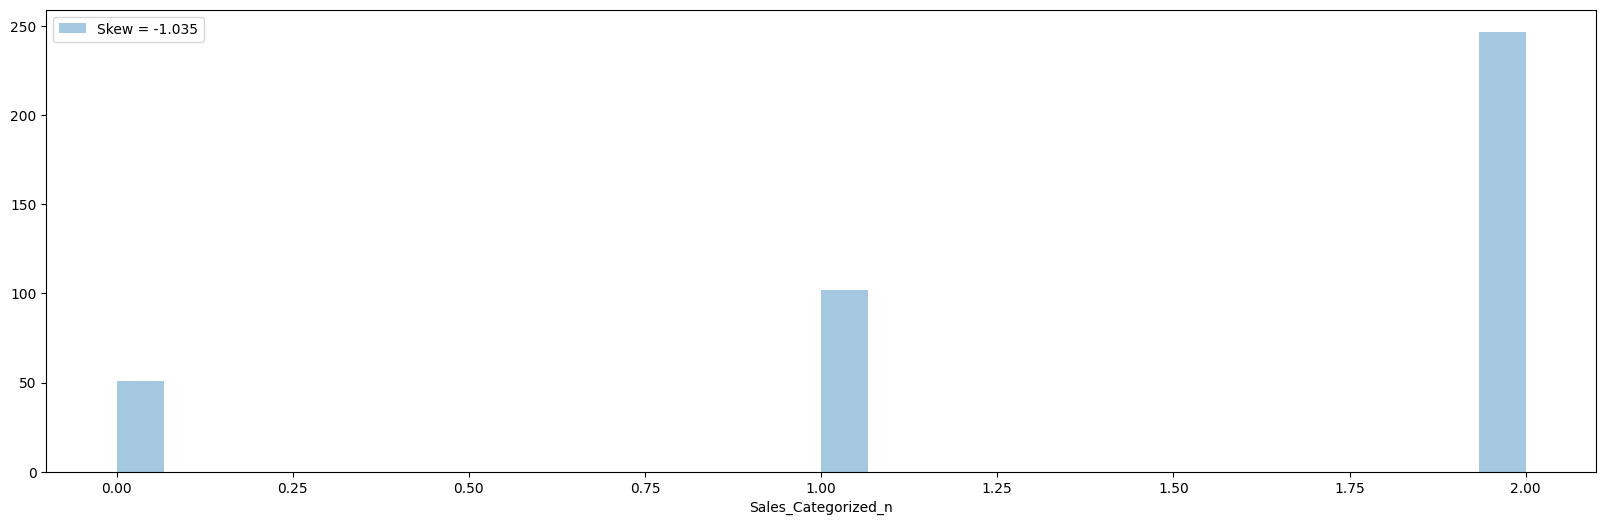

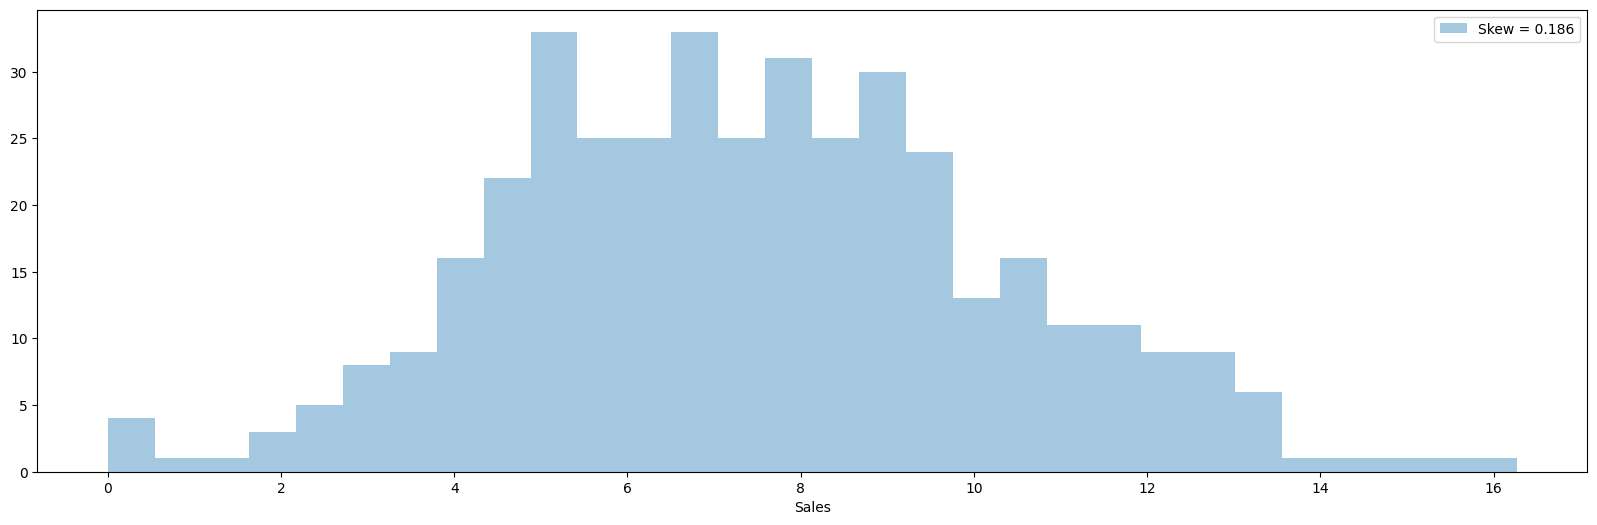

In [43]:
numerical_features=[feature for feature in comp_data2.columns if comp_data2[feature].dtypes != 'O']
for feat in numerical_features:
    f,ax = plt.subplots(figsize=(20,6))
    skew = comp_data2[feat].skew()
    sns.distplot(comp_data2[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### **Correlation Matrix** ###
Check for Assumption: Independent variables are independent of each other

In [44]:
comp_data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0            0        1     1                    2  
1            1        1     1                    0  
2            2        1     1                    2  
3            2        1     1                    2  
4            0        1     0                    1

In [45]:
comp_data.corr()

CompPrice    Income  Advertising  Population     Price  \
CompPrice             1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income               -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising          -0.024199  0.058995     1.000000    0.265652  0.044537   
Population           -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price                 0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age                  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education             0.025197 -0.056855    -0.033594   -0.106378  0.011747   
ShelveLoc_n           0.023350 -0.067678     0.008544   -0.044772  0.014633   
Urban_n               0.066594  0.037967     0.042035   -0.052025  0.047016   
US_n                  0.016869  0.089601     0.684460    0.060564  0.057861   
Sales_Categorized_n  -0.011509 -0.039131     0.000816    0.025202  0.088405   

                          Age  Education  ShelveLoc_n   Urban_n      US_n  \
CompPrice           -0.100239   0.025197     0.023350  0.066594  0.016869   
Income              -0.004670  -0.056855    -0.067678  0.037967  0.089601   
Advertising         -0.004557  -0.033594     0.008544  0.042035  0.684460   
Population          -0.042663  -0.106378    -0.044772 -0.052025  0.060564   
Price               -0.102177   0.011747     0.014633  0.047016  0.057861   
Age                  1.000000   0.006488     0.056488  0.028479  0.008652   
Education            0.006488   1.000000     0.001492 -0.033094 -0.078250   
ShelveLoc_n          0.056488   0.001492     1.000000 -0.063978 -0.039760   
Urban_n              0.028479  -0.033094    -0.063978  1.000000  0.047085   
US_n                 0.008652  -0.078250    -0.039760  0.047085  1.000000   
Sales_Categorized_n  0.002346   0.030381     0.214414 -0.032248 -0.047204   

                     Sales_Categorized_n  
CompPrice                      -0.011509  
Income                         -0.039131  
Advertising                     0.000816  
Population                      0.025202  
Price                           0.088405  
Age                             0.002346  
Education                       0.030381  
ShelveLoc_n                     0.214414  
Urban_n                        -0.032248  
US_n                           -0.047204  
Sales_Categorized_n             1.000000

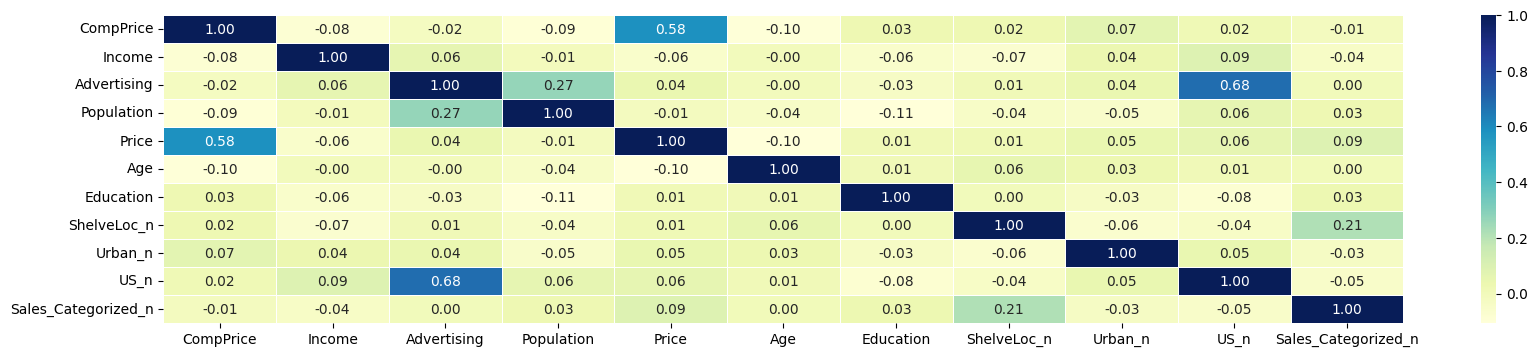

In [46]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(comp_data.corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

#### **Positive Correlation:** ####
- We see a positive correlation between US_n and Advertizing
- We see a positive correlation between Price and CompPrice
- We see a positive correlation between Population and Advertizing

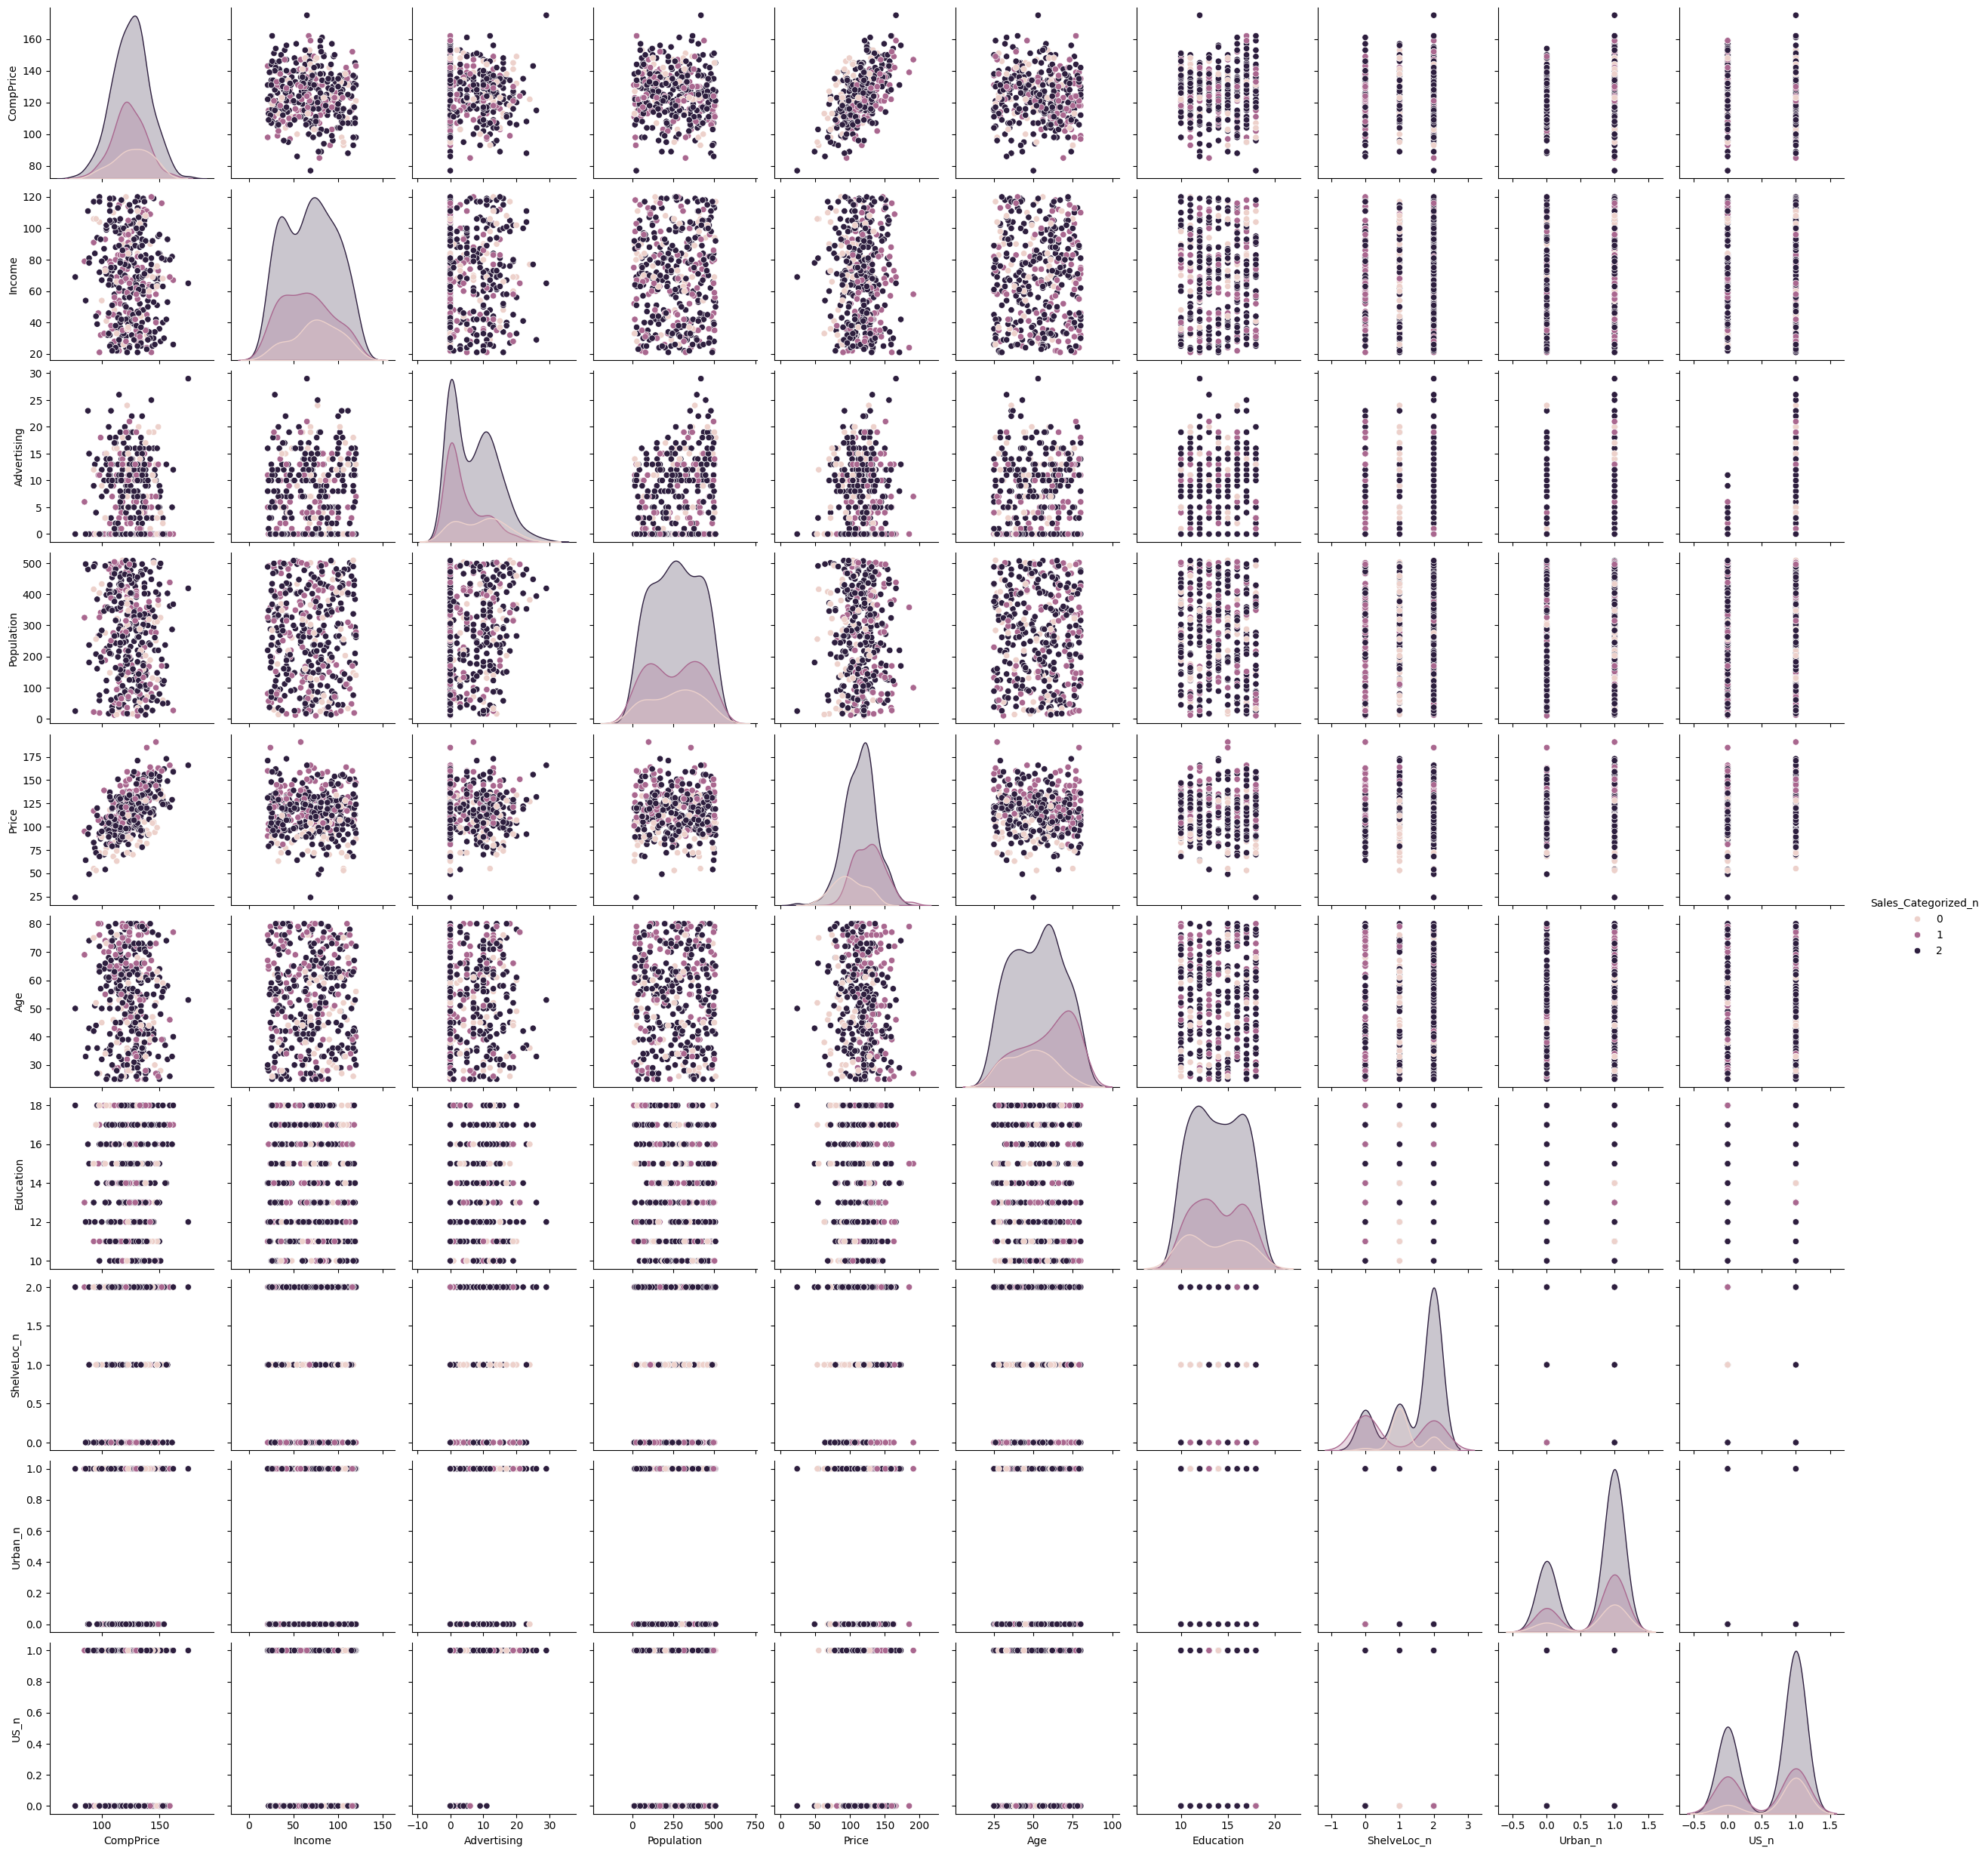

In [47]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(comp_data, hue='Sales_Categorized_n')

### ***Function to get all the details for Accuracy, Classification Report and Confustion Matrix*** ###

In [48]:
# Function to get all the metrics like Accuracy Score, ROC_AUC, Classification Report and Confusion Matrix
# based on the classification model, train and test x and y values
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"ACCURACY: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"ROC_AUC: {metrics.roc_auc_score(y_train, clf.predict_proba(x_train), multi_class='ovr') * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"ACCURACY: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"ROC_AUC: {metrics.roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr') * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")

## **DECISION TREE** ##

## **Imbalanced Data** ##

### ***Categorizing Training and Testing Sets with testing sample size as 30%*** ###

In [49]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train_comp, x_test_comp, y_train_comp, y_test_comp = train_test_split(inputs_comp, target_comp, test_size=0.3)

In [50]:
inputs_comp

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  
0              0        1     1  
1              1        1     1  
2              2        1     1  
3              2        1     1  
4              0        1     0  
..           ...      ...   ...  
395            1        1     1  
396            2        0     1  
397            2        1     1  
398            0        1     1  
399            1        1     1  

[400 rows x 10 columns]

In [51]:
target_comp

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_Categorized_n, Length: 400, dtype: int32

In [52]:
print("Shape of x_train_comp: ",x_train_comp.shape)
print("Shape of x_test_comp: ", x_test_comp.shape)
print("Shape of y_train_comp: ",y_train_comp.shape)
print("Shape of y_test_comp: ",y_test_comp.shape)

Shape of x_train_comp:  (280, 10)
Shape of x_test_comp:  (120, 10)
Shape of y_train_comp:  (280,)
Shape of y_test_comp:  (120,)


### **Training the Decision Tree Model with default parameters for Criteria and Max Depth** ###

In [53]:
# Preparing a Decision Trees model on training data set
from sklearn.tree import DecisionTreeClassifier
comp_model = DecisionTreeClassifier()
comp_model.fit(x_train_comp, y_train_comp)

DecisionTreeClassifier()

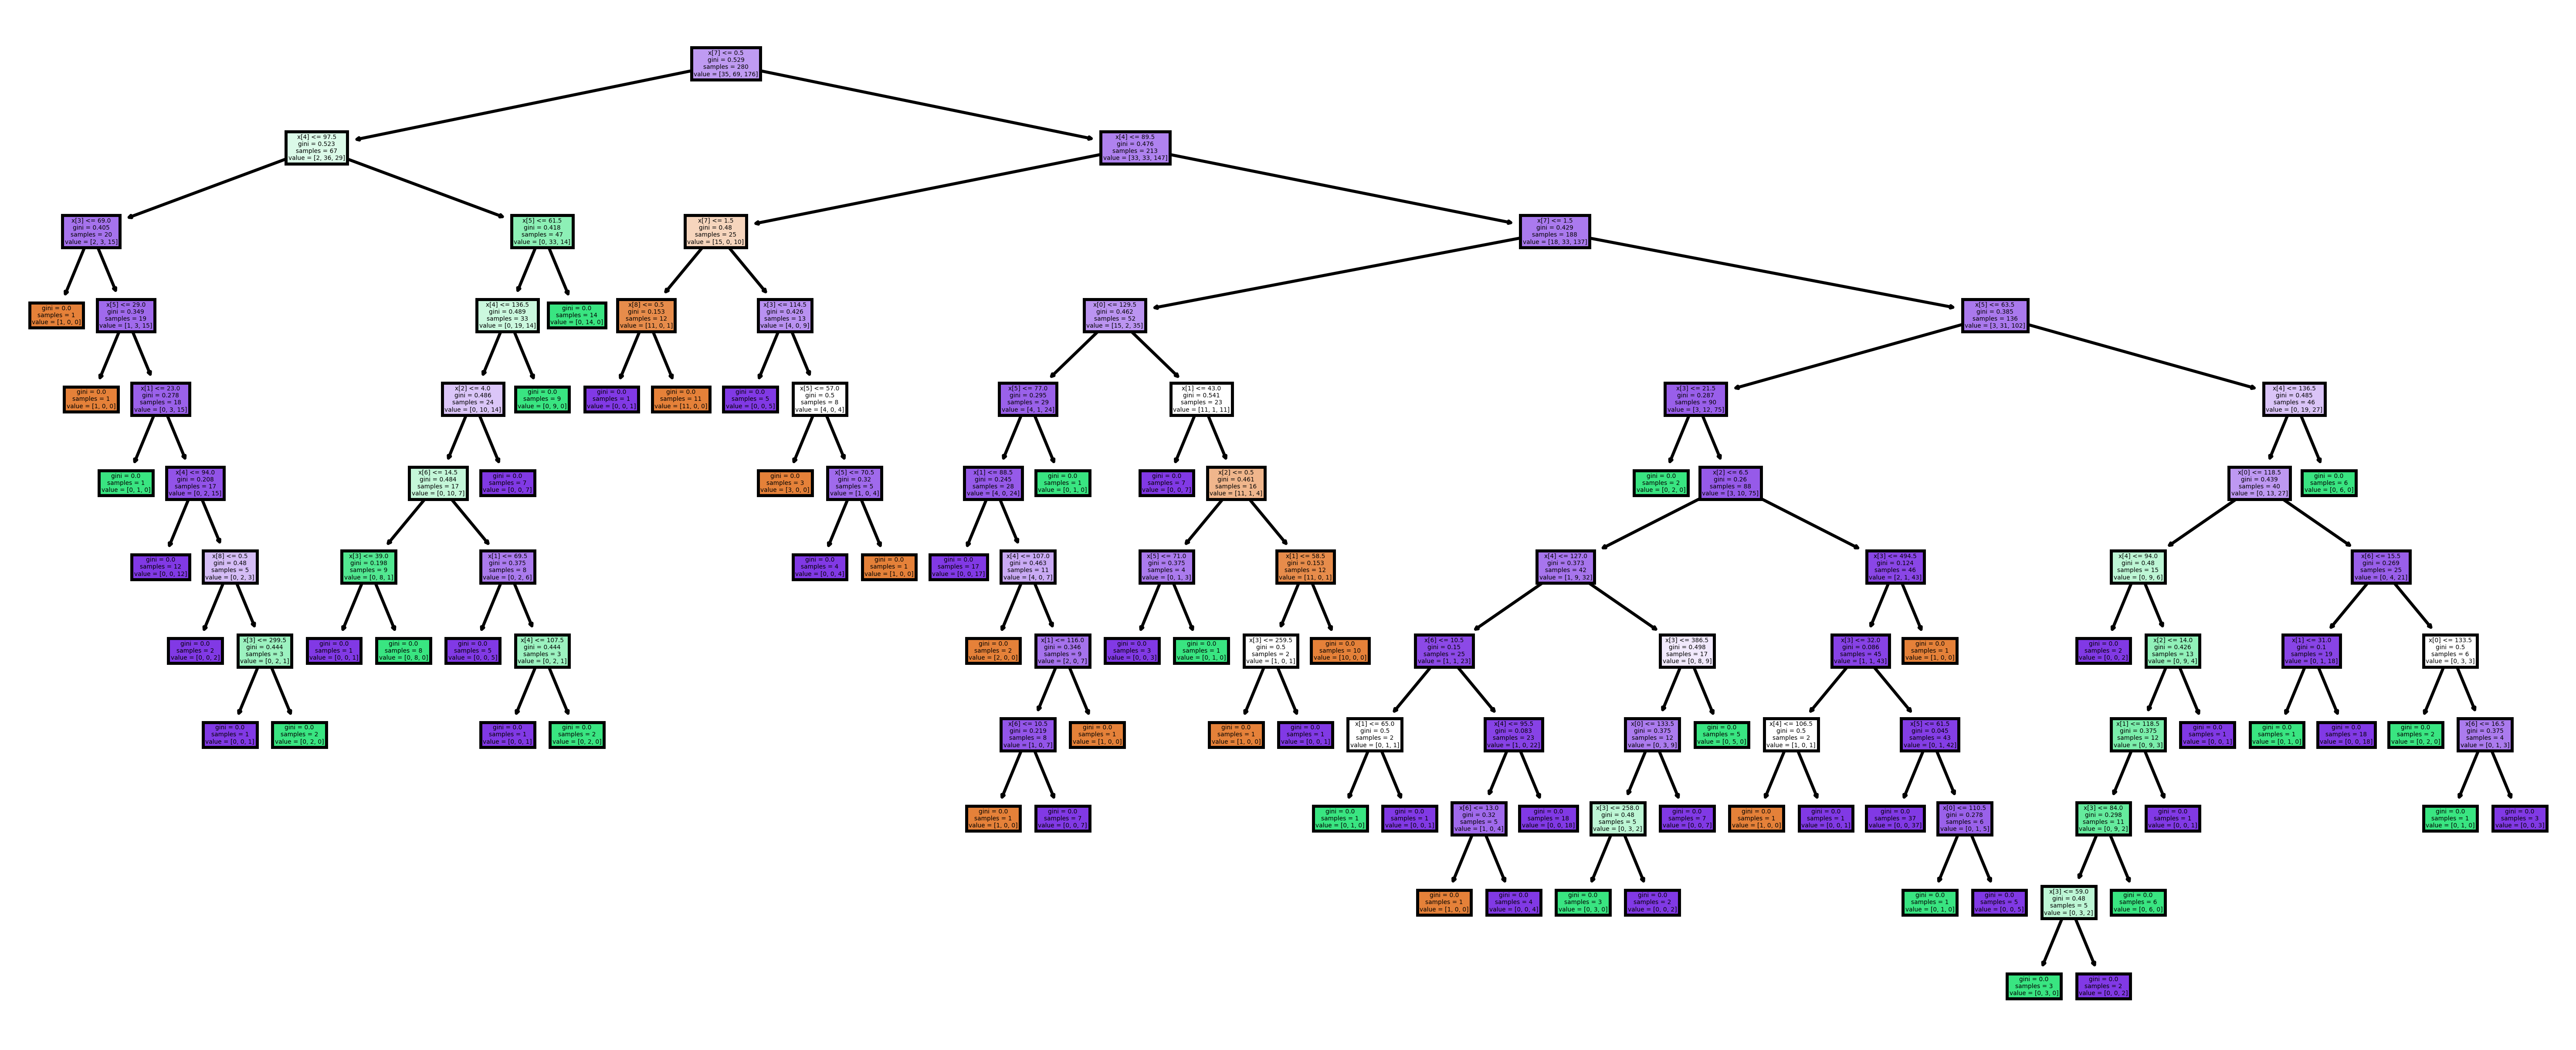

In [54]:
plt.figure(figsize=(15,6),dpi=500)
tree.plot_tree(comp_model,filled=True)
plt.show()

In [55]:
# Making predictions on the testing set
comp_y_pred = comp_model.predict(x_test_comp)
comp_y_pred

array([1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2])

In [56]:
pd.crosstab(y_test_comp,comp_y_pred) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0                0   1   2
Sales_Categorized_n           
0                    5   0  11
1                    0  21  12
2                    7   5  59

In [57]:
print_score(comp_model, x_train_comp, y_train_comp, x_test_comp, y_test_comp, train=True)
print_score(comp_model, x_train_comp, y_train_comp, x_test_comp, y_test_comp, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 100.00%

____________________________________________________________________

ROC_AUC: 100.00%

____________________________________________________________________

CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    35.0  69.0  176.0       1.0      280.0         280.0

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 35   0   0]
 [  0  69   0]
 [  0   0 176]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 70.83%

_________________

In [58]:
# Calculation based on the 2 way matrix table
diag_1 = np.trace(pd.crosstab(y_test_comp,comp_y_pred))
total_1 = sum(pd.crosstab(y_test_comp,comp_y_pred).sum())
acc_1 = diag_1/total_1
print(f"The calculation done on the 2 way matrix table -\nThe sum of diagonal elements is {diag_1} and total elements is {total_1} and accuracy is {acc_1}") 

The calculation done on the 2 way matrix table -
The sum of diagonal elements is 85 and total elements is 120 and accuracy is 0.7083333333333334


*Checking accuracy using Metrics*

In [59]:
# Checking accuracy by comparing actual response values (y_test_comp) with predicted
# response values (comp_y_pred)
from sklearn import metrics
score = metrics.accuracy_score(y_test_comp, comp_y_pred)
print("Accuracy using metrics:", score)

Accuracy using metrics: 0.7083333333333334


*Checking accuracy using Alternate Method*

In [60]:
# Checking accuracy using alternate method
comp_score_alt = comp_model.score(x_test_comp, y_test_comp)
print("Accuracy using alternate method:", comp_score_alt)

Accuracy using alternate method: 0.7083333333333334


In [61]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc = metrics.accuracy_score(y_train_comp, comp_model.predict(x_train_comp))
testing_acc = metrics.accuracy_score(y_test_comp, comp_model.predict(x_test_comp))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc}\nTesting Accuracy: {testing_acc}")

Accuracy using metrics-
Training Accuracy: 1.0
Testing Accuracy: 0.7083333333333334


In [62]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc = metrics.roc_auc_score(y_test_comp, comp_model.predict_proba(x_test_comp), multi_class='ovr')
print(f"The ROC_AUC value is {roc_auc}")

The ROC_AUC value is 0.6976138066798407


*Confusion Matrix*

[1 0 2 2 2 2 1 2 0 2 2 1 2 1 2 2 0 2 1 1 1 2 2 1 1 2 1 0 2 2 2 2 0 1 2 2 2
 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 1 2 2
 0 1 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 1 0 2 1 0 1 2 1 0 2 2 2 1
 1 2 2 2 2 2 1 2 2]

The sum of diagonal elements is 85 and total elements is 120 and manually calculated score is 0.7083333333333334

The metrics accuracy score calculated is - 0.7083333333333334

Both the scores match.



col_0                0   1   2
Sales_Categorized_n           
0                    5   0  11
1                    0  21  12
2                    7   5  59

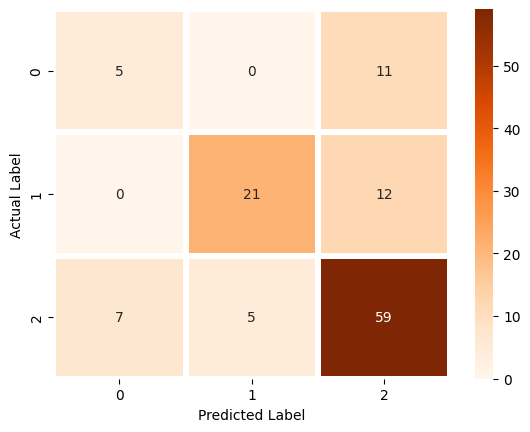

In [63]:
# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
comp_y_pred = comp_model.predict(x_test_comp)

pd.Series(comp_y_pred).value_counts() # getting the count of each category
print(comp_y_pred)
classnames = ['0','1','2']
confusionmatrix = confusion_matrix(y_test_comp,comp_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Oranges",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")



diag = np.trace(confusionmatrix)
total = sum(sum(confusionmatrix))
maccs = diag/total
print(f"\nThe sum of diagonal elements is {diag} and total elements is {total} and manually calculated score is {maccs}\n") 

mascore = metrics.accuracy_score(y_test_comp, comp_y_pred)
print(f"The metrics accuracy score calculated is - {mascore}\n")
print("Both the scores match.\n")

pd.crosstab(y_test_comp,comp_y_pred) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

### **Pruning the decision tree** ###

In [64]:
# Pruning the decision tree
treepath = comp_model.cost_complexity_pruning_path(x_train_comp, y_train_comp)
treepath

{'ccp_alphas': array([0.        , 0.00327381, 0.00335714, 0.00345238, 0.00420168,
        0.0047619 , 0.00494505, 0.0052521 , 0.00535714, 0.00535714,
        0.00553571, 0.00555556, 0.00571429, 0.00593407, 0.00595238,
        0.00634921, 0.00647692, 0.00653209, 0.00654762, 0.00664286,
        0.00703297, 0.00803571, 0.01057531, 0.01230159, 0.01296429,
        0.01427305, 0.01443452, 0.01448525, 0.01578628, 0.0165293 ,
        0.02601858, 0.03098217, 0.04151478]),
 'impurities': array([0.        , 0.00654762, 0.01997619, 0.03378571, 0.04639076,
        0.05115266, 0.07093288, 0.07618498, 0.08154212, 0.09225641,
        0.10332784, 0.11443895, 0.12015324, 0.1260873 , 0.13203968,
        0.13838889, 0.15781965, 0.16435174, 0.17089936, 0.18418507,
        0.19825101, 0.21432244, 0.25662368, 0.28122685, 0.29419114,
        0.32273724, 0.33717176, 0.36614225, 0.41350109, 0.4300304 ,
        0.45604897, 0.48703114, 0.52854592])}

In [65]:
ccp_alphas, impurities = treepath.ccp_alphas, treepath.impurities

In [66]:
classifiers = []
for treepath.ccp_alphas in ccp_alphas:
    sales_prunedtree = DecisionTreeClassifier(random_state=1, ccp_alpha=treepath.ccp_alphas)
    sales_prunedtree.fit(x_train_comp, y_train_comp)
    classifiers.append(sales_prunedtree)

In [67]:
classifiers

[DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.003273809523809524, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0033571428571428567, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0034523809523809537, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.004201680672268907, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0047619047619047615, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.004945054945054945, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005252100840336135, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005357142857142857, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005357142857142857, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005535714285714288, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005555555555555555, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005714285714285713, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.005934065934065931, random_state=1),
 Decisi

In [68]:
# Accuracy calculated for each of the alpha values
from sklearn import metrics
accuracy_train = [metrics.accuracy_score(y_train_comp,sales_prunedtree.predict(x_train_comp)) for sales_prunedtree in classifiers]
accuracy_test = [metrics.accuracy_score(y_test_comp,sales_prunedtree.predict(x_test_comp)) for sales_prunedtree in classifiers]

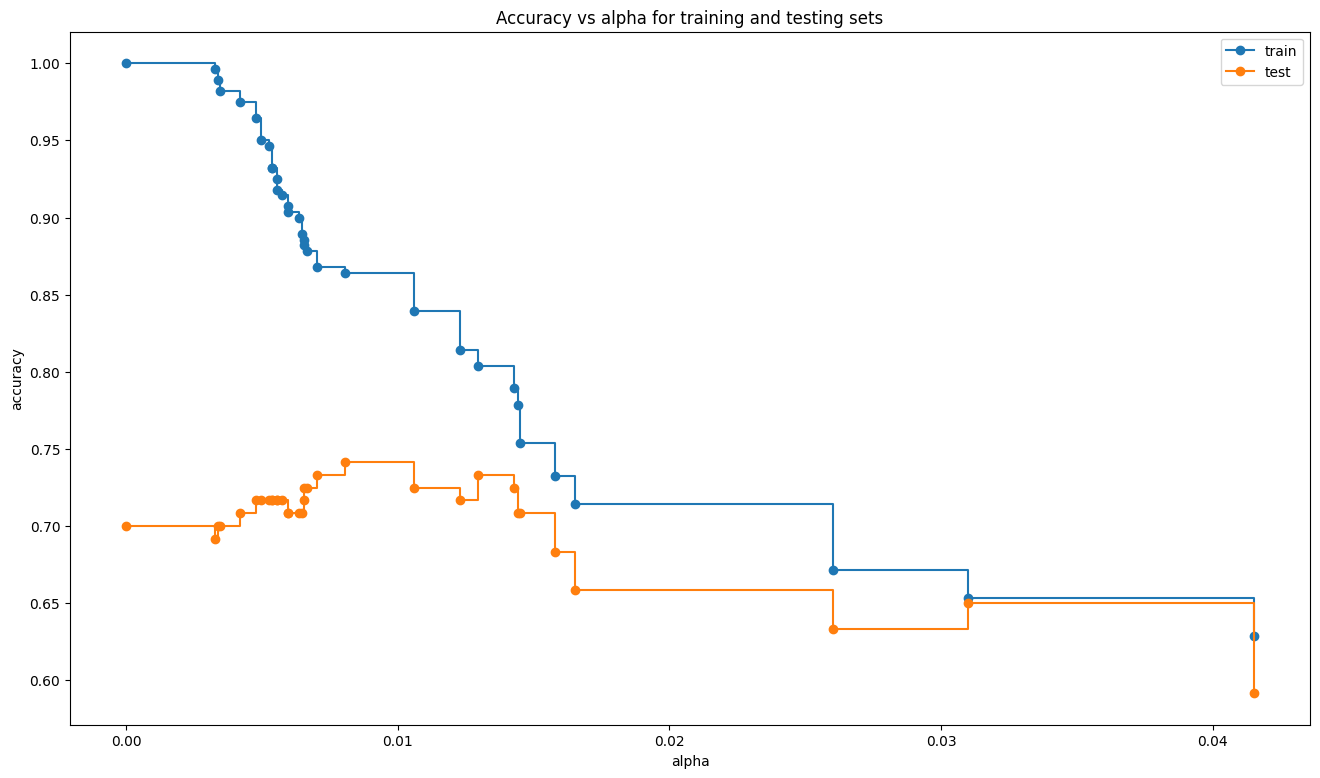

In [69]:
train_scores = [clf.score(x_train_comp, y_train_comp) for clf in classifiers]
test_scores = [clf.score(x_test_comp, y_test_comp) for clf in classifiers]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

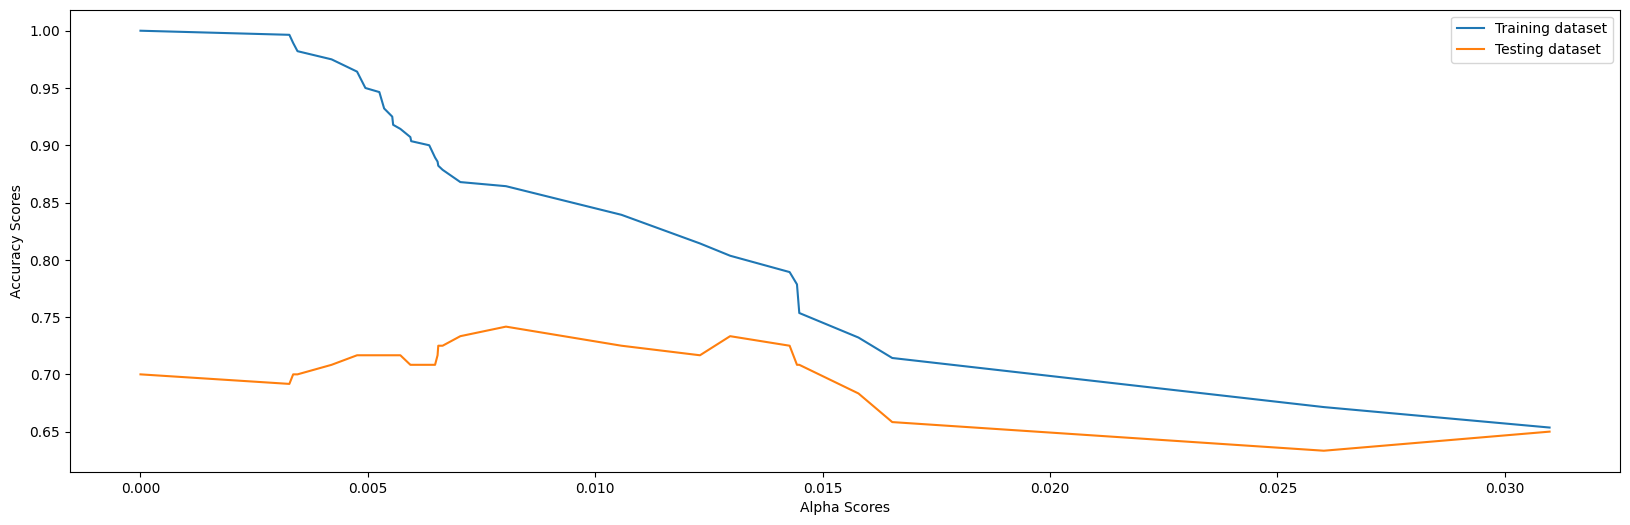

In [70]:
# Plotting the alpha scores and the accuracy
plt.figure(figsize=(20,6))
plt.plot(ccp_alphas[:-1],accuracy_train[:-1],label="Training dataset")
plt.plot(ccp_alphas[:-1],accuracy_test[:-1],label="Testing dataset")

plt.xlabel("Alpha Scores")
plt.ylabel("Accuracy Scores")
plt.legend()

#### *Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other* ####

In [71]:
comp_model_3 = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.033684088733349826)
comp_model_3.fit(x_train_comp,y_train_comp)

DecisionTreeClassifier(ccp_alpha=0.033684088733349826)

In [72]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc = metrics.accuracy_score(y_train_comp, comp_model_3.predict(x_train_comp))
testing_acc = metrics.accuracy_score(y_test_comp, comp_model_3.predict(x_test_comp))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc}\nTesting Accuracy: {testing_acc}")

Accuracy using metrics-
Training Accuracy: 0.6535714285714286
Testing Accuracy: 0.65


Text(50.722222222222214, 0.5, 'Actual Label')

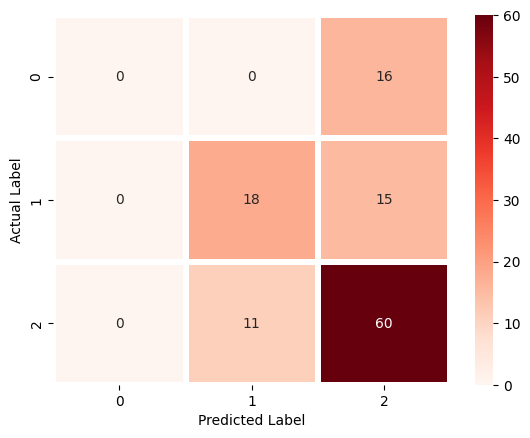

In [73]:
classnames = ['0','1','2']
confusionmatrix = confusion_matrix(y_test_comp,comp_model_3.predict(x_test_comp))
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [74]:
# Calculation based on the 2 way matrix table
diag_1 = np.trace(confusionmatrix)
total_1 = sum(sum(confusionmatrix))
acc_1 = diag_1/total_1
print(f"The calculation done on the 2 way matrix table -\nThe sum of diagonal elements is {diag_1} and total elements is {total_1} and accuracy is {acc_1}") 

The calculation done on the 2 way matrix table -
The sum of diagonal elements is 78 and total elements is 120 and accuracy is 0.65


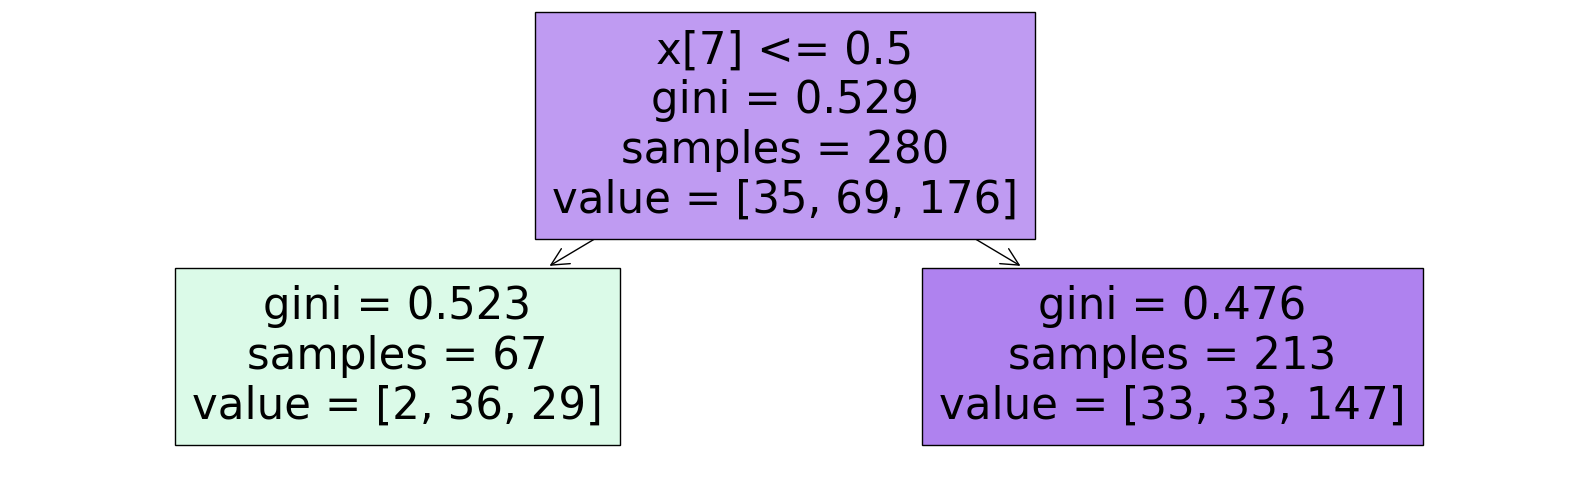

In [75]:
plt.figure(figsize=(20,6))
tree.plot_tree(comp_model_3,filled=True)
plt.show()

### ***Categorizing Training and Testing Sets with test sample size as 20%*** ###

In [76]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: x_train_comp_1, x_test_comp_1,y_train_comp_1,y_test_comp_1

from sklearn.model_selection import train_test_split
x_train_comp_1, x_test_comp_1,y_train_comp_1,y_test_comp_1 = train_test_split(inputs_comp, target_comp, test_size=0.2, random_state=40)

In [77]:
print("Shape of x_train_comp_1: ",x_train_comp_1.shape)
print("Shape of x_test_comp_1: ", x_test_comp_1.shape)
print("Shape of y_train_comp_1: ",y_train_comp_1.shape)
print("Shape of y_test_comp_1: ",y_test_comp_1.shape)

Shape of x_train_comp_1:  (320, 10)
Shape of x_test_comp_1:  (80, 10)
Shape of y_train_comp_1:  (320,)
Shape of y_test_comp_1:  (80,)


### **Building the Decision Tree Classifier using Entropy Criteria** ###

*Training the model*

In [78]:
comp_model_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
comp_model_1.fit(x_train_comp_1,y_train_comp_1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 1.307\nsamples = 320\nvalue = [43, 77, 200]'),
 Text(0.25, 0.625, 'x[4] <= 88.5\nentropy = 1.127\nsamples = 83\nvalue = [2, 46, 35]'),
 Text(0.125, 0.375, 'x[0] <= 124.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 0, 10]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(0.1875, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.375, 0.375, 'x[4] <= 136.5\nentropy = 0.936\nsamples = 71\nvalue = [0, 46, 25]'),
 Text(0.3125, 0.125, 'entropy = 0.989\nsamples = 57\nvalue = [0, 32, 25]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0]'),
 Text(0.75, 0.625, 'x[7] <= 1.5\nentropy = 1.185\nsamples = 237\nvalue = [41, 31, 165]'),
 Text(0.625, 0.375, 'x[4] <= 97.5\nentropy = 0.996\nsamples = 67\nvalue = [31, 0, 36]'),
 Text(0.5625, 0.125, 'entropy = 0.391\nsamples = 13\nvalue = [12, 0, 1]'),
 Text(0.6875, 0.125, 'entropy = 0.936\nsamples = 54\nvalue = [19, 0, 35]'),
 Text(0.875, 0.375, 'x

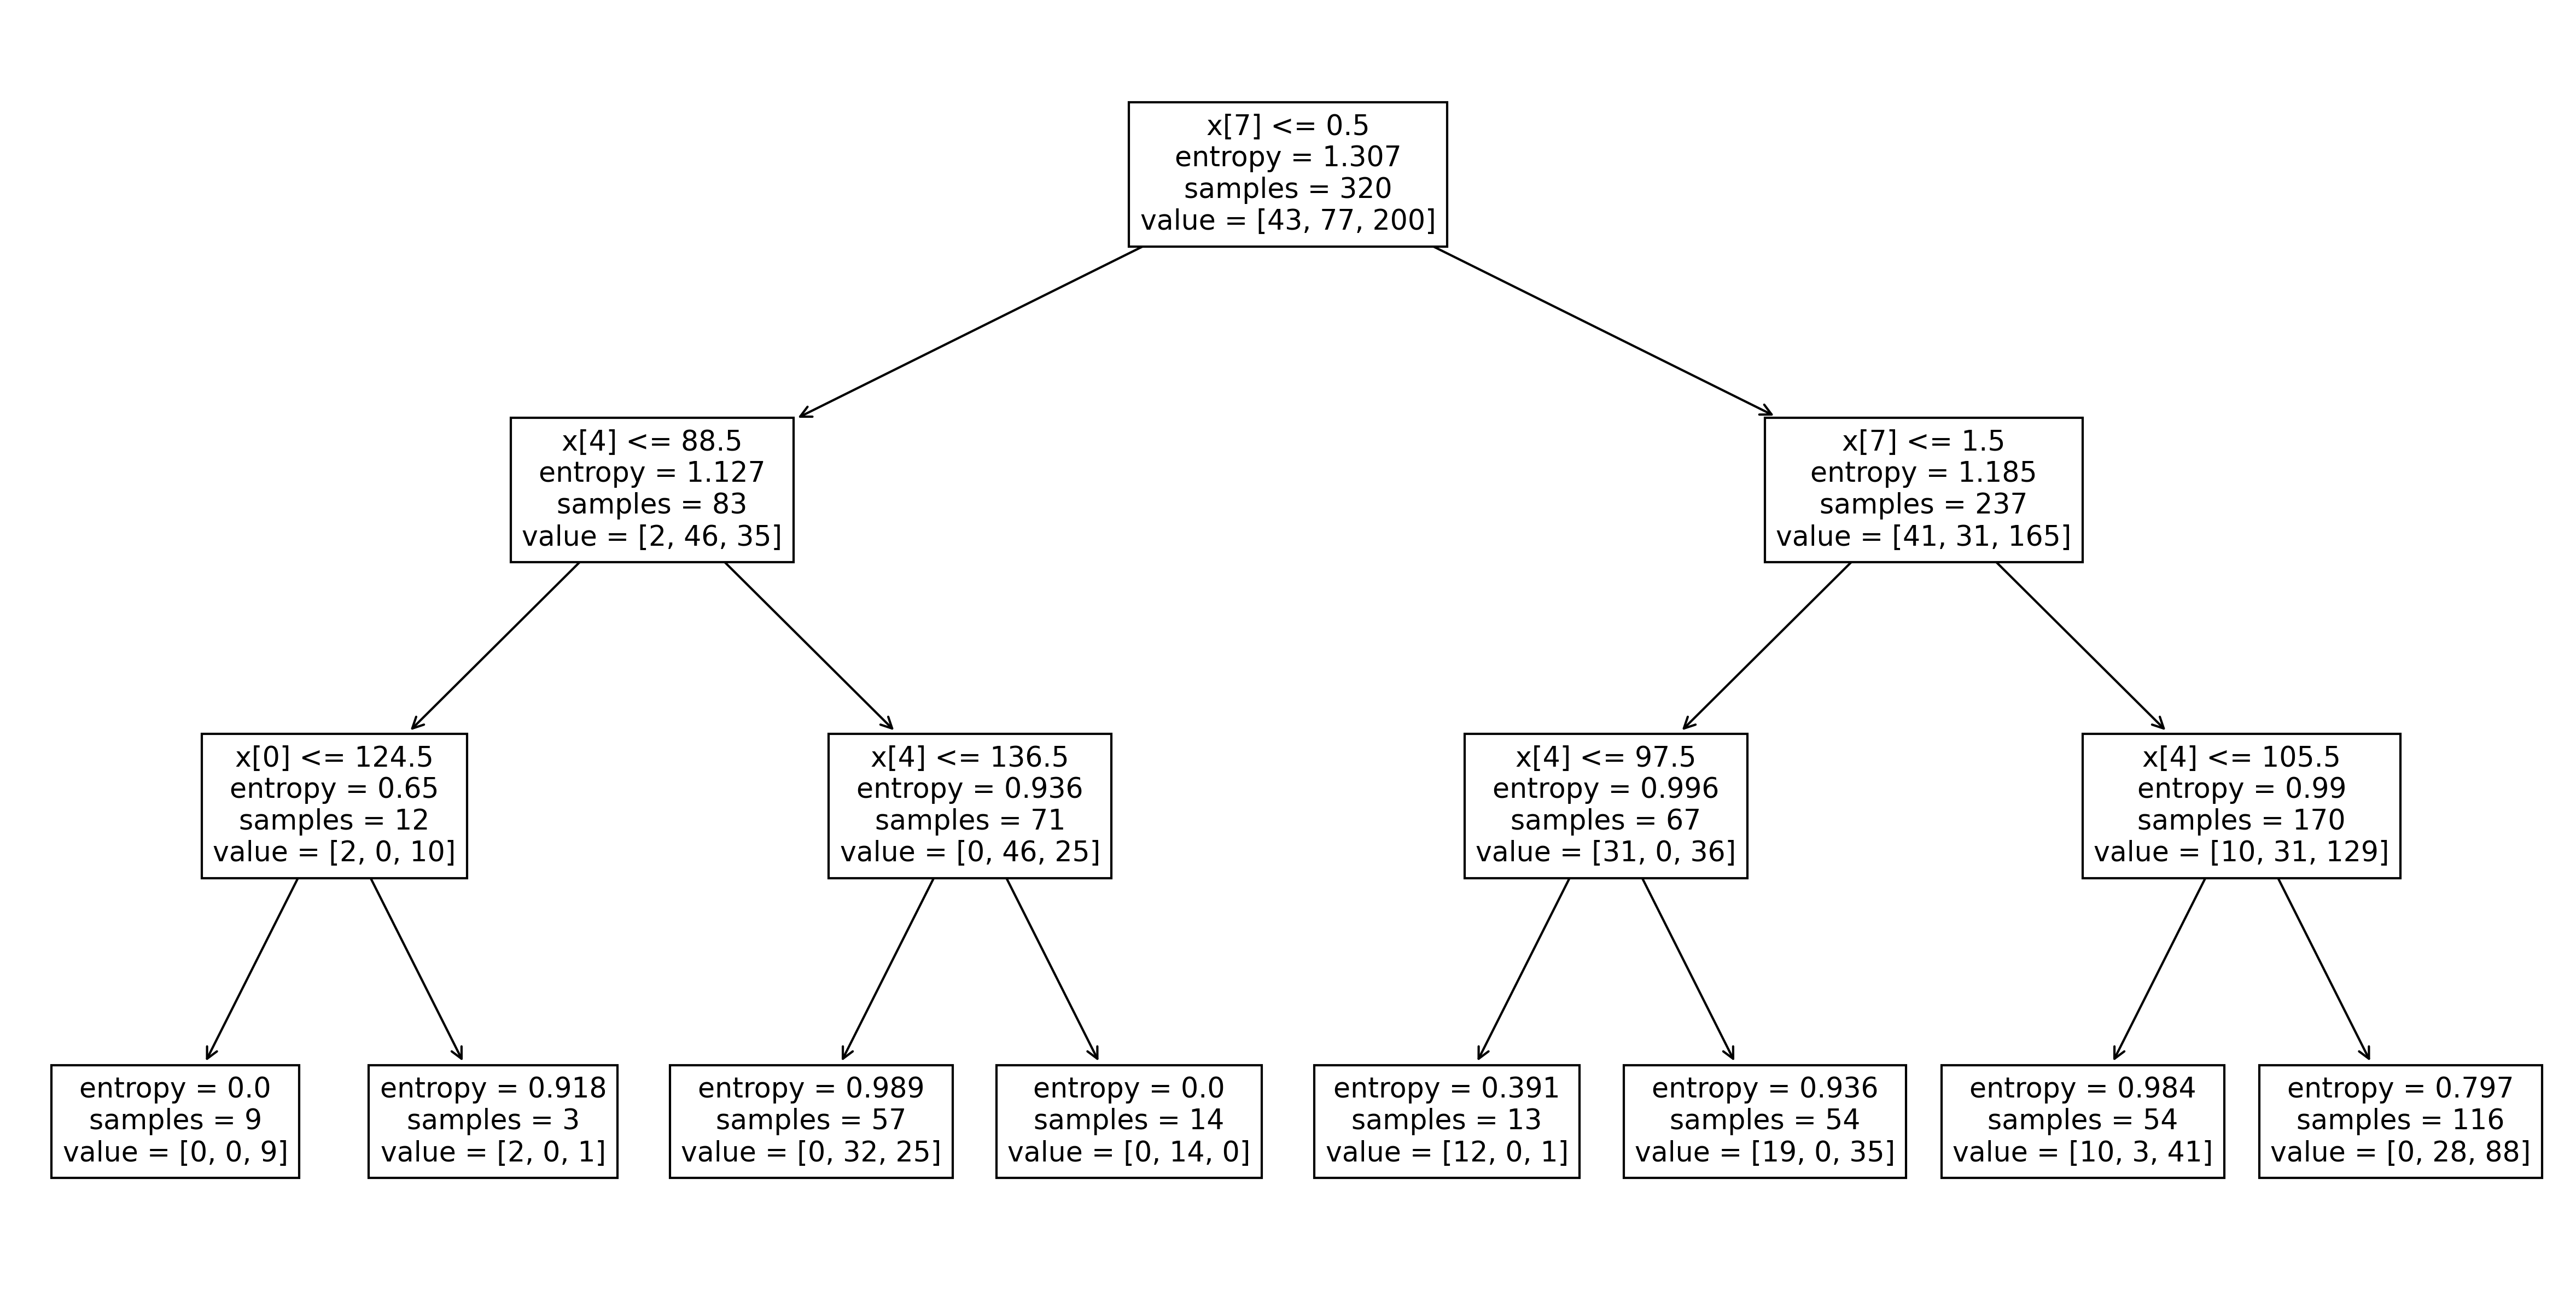

In [79]:
# Plot the decision tree

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(comp_model_1)

In [80]:
y_train_comp_1.value_counts()

Sales_Categorized_n
2    200
1     77
0     43
Name: count, dtype: int64

[Text(0.5, 0.875, 'ShelveLoc_n <= 0.5\nentropy = 1.307\nsamples = 320\nvalue = [43, 77, 200]\nclass = High'),
 Text(0.25, 0.625, 'Price <= 88.5\nentropy = 1.127\nsamples = 83\nvalue = [2, 46, 35]\nclass = Medium'),
 Text(0.125, 0.375, 'CompPrice <= 124.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 0, 10]\nclass = High'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]\nclass = High'),
 Text(0.1875, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = Low'),
 Text(0.375, 0.375, 'Price <= 136.5\nentropy = 0.936\nsamples = 71\nvalue = [0, 46, 25]\nclass = Medium'),
 Text(0.3125, 0.125, 'entropy = 0.989\nsamples = 57\nvalue = [0, 32, 25]\nclass = Medium'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0]\nclass = Medium'),
 Text(0.75, 0.625, 'ShelveLoc_n <= 1.5\nentropy = 1.185\nsamples = 237\nvalue = [41, 31, 165]\nclass = High'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 0.996\nsamples = 67\nvalue = [31, 0, 36]\nclass = High'),
 Tex

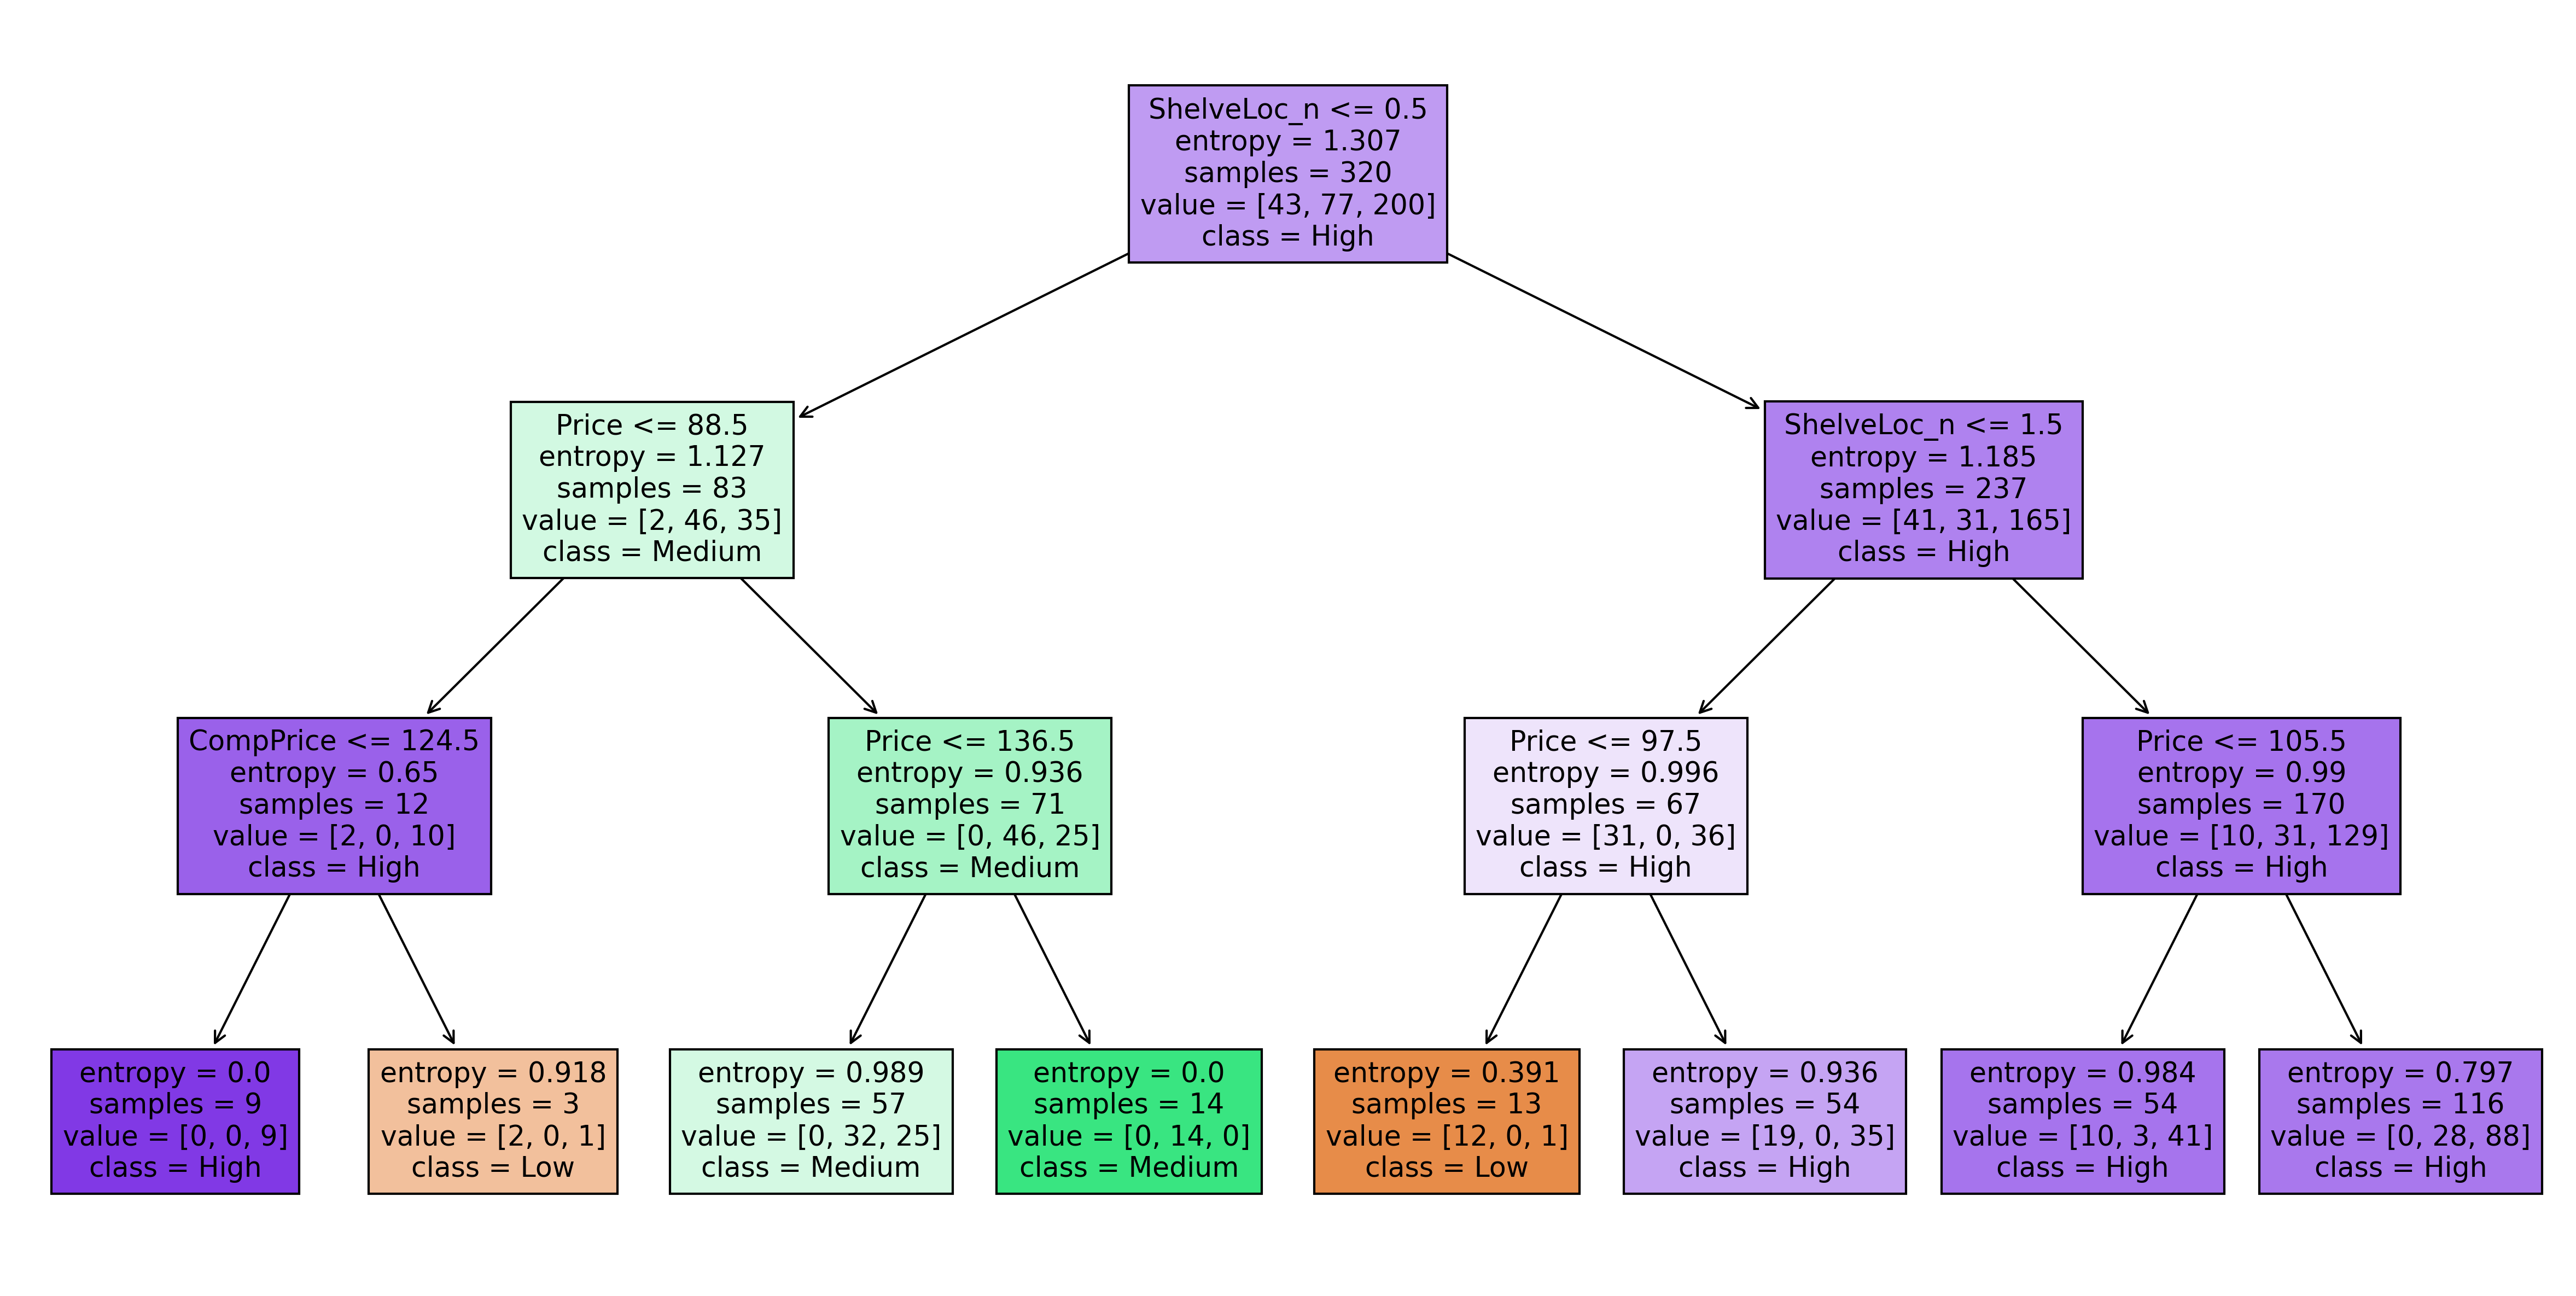

In [81]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_n','Urban_n','US_n']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(comp_model_1, feature_names = fn, class_names=cn, filled = True)

In [82]:
# Predicting on test data
comp_pred_1 = comp_model_1.predict(x_test_comp_1) # predicting on test data set
comp_pred_1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [83]:
pd.Series(comp_pred_1).value_counts() # getting the count of each category

2    63
1    12
0     5
Name: count, dtype: int64

In [84]:
pd.crosstab(y_test_comp_1,comp_pred_1) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0                0  1   2
Sales_Categorized_n          
0                    4  0   4
1                    0  7  18
2                    1  5  41

In [85]:
print_score(comp_model_1, x_train_comp_1, y_train_comp_1, x_test_comp_1, y_test_comp_1, train=True)
print_score(comp_model_1, x_train_comp_1, y_train_comp_1, x_test_comp_1, y_test_comp_1, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 72.81%

____________________________________________________________________

ROC_AUC: 83.36%

____________________________________________________________________

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.875000   0.647887    0.742489  0.728125    0.755126   
recall      0.325581   0.597403    0.865000  0.728125    0.595995   
f1-score    0.474576   0.621622    0.799076  0.728125    0.631758   
support    43.000000  77.000000  200.000000  0.728125  320.000000   

           weighted avg  
precision      0.737532  
recall         0.728125  
f1-score       0.712772  
support      320.000000  

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 14   0  29]
 [  0  46  31]
 [  2  25 173]]


*********************************

In [86]:
# Checking accuracy by comparing metrics method
from sklearn import metrics
accuracy_pred_1 = metrics.accuracy_score(y_test_comp_1,comp_pred_1)
print("Accuracy using metrics:", accuracy_pred_1)

Accuracy using metrics: 0.65


In [87]:
# Calculating the accuracy using numpy mean
accuracy_pred_1 = np.mean(comp_pred_1==y_test_comp_1)
print(f"The accuracy using numpy mean is {accuracy_pred_1}")

The accuracy using numpy mean is 0.65


In [88]:
# Checking accuracy using alternate method
accuracy_pred_1 = comp_model_1.score(x_test_comp_1, y_test_comp_1)
print("Accuracy using alternate method:", accuracy_pred_1)

Accuracy using alternate method: 0.65


In [89]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_1 = metrics.accuracy_score(y_train_comp_1, comp_model_1.predict(x_train_comp_1))
testing_acc_1 = metrics.accuracy_score(y_test_comp_1, comp_model_1.predict(x_test_comp_1))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_1}\nTesting Accuracy: {testing_acc_1}")

Accuracy using metrics-
Training Accuracy: 0.728125
Testing Accuracy: 0.65


### **Building Decision Tree Classifier (CART) using Gini Criteria** ###

In [90]:
from sklearn.tree import DecisionTreeClassifier
comp_model_2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [91]:
comp_model_2.fit(x_train_comp_1, y_train_comp_1)

DecisionTreeClassifier(max_depth=3)

In [92]:
# Prediction and computing the accuracy
comp_pred_2=comp_model_2.predict(x_test_comp_1)
np.mean(comp_pred_1==y_test_comp_1)

0.65

In [93]:
print_score(comp_model_2, x_train_comp_1, y_train_comp_1, x_test_comp_1, y_test_comp_1, train=True)
print_score(comp_model_2, x_train_comp_1, y_train_comp_1, x_test_comp_1, y_test_comp_1, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 75.31%

____________________________________________________________________

ROC_AUC: 83.71%

____________________________________________________________________

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.923077   0.800000    0.735409  0.753125    0.819495   
recall      0.279070   0.519481    0.945000  0.753125    0.581183   
f1-score    0.428571   0.629921    0.827133  0.753125    0.628542   
support    43.000000  77.000000  200.000000  0.753125  320.000000   

           weighted avg  
precision      0.776169  
recall         0.753125  
f1-score       0.726123  
support      320.000000  

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 12   0  31]
 [  0  40  37]
 [  1  10 189]]


*********************************

In [94]:
pd.crosstab(y_test_comp_1,comp_pred_2) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0                0  1   2
Sales_Categorized_n          
0                    4  0   4
1                    0  5  20
2                    1  1  45

In [95]:
# Checking accuracy by comparing metrics method
from sklearn import metrics
accuracy_pred_2 = metrics.accuracy_score(y_test_comp_1,comp_pred_2)
print("Accuracy using metrics:", accuracy_pred_2)


Accuracy using metrics: 0.675


In [96]:
# Calculating the accuracy
accuracy_pred_2 = np.mean(comp_pred_2==y_test_comp_1)
print(f"The accuracy is {accuracy_pred_2}")

The accuracy is 0.675


In [97]:
# Checking accuracy using alternate method
accuracy_pred_2 = comp_model_2.score(x_test_comp_1, y_test_comp_1)
print("Accuracy using alternate method:", accuracy_pred_2)

Accuracy using alternate method: 0.675


In [98]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_2 = metrics.accuracy_score(y_train_comp_1, comp_model_2.predict(x_train_comp_1))
testing_acc_2 = metrics.accuracy_score(y_test_comp_1, comp_model_2.predict(x_test_comp_1))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_2}\nTesting Accuracy: {testing_acc_2}")

Accuracy using metrics-
Training Accuracy: 0.753125
Testing Accuracy: 0.675


In [99]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc_2 = metrics.roc_auc_score(y_test_comp_1, comp_model_2.predict_proba(x_test_comp_1), multi_class='ovr')
print(f"The ROC_AUC value is {roc_auc_2}")

The ROC_AUC value is 0.7136455333476611


              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.83      0.20      0.32        25
           2       0.65      0.96      0.78        47

    accuracy                           0.68        80
   macro avg       0.76      0.55      0.57        80
weighted avg       0.72      0.68      0.62        80



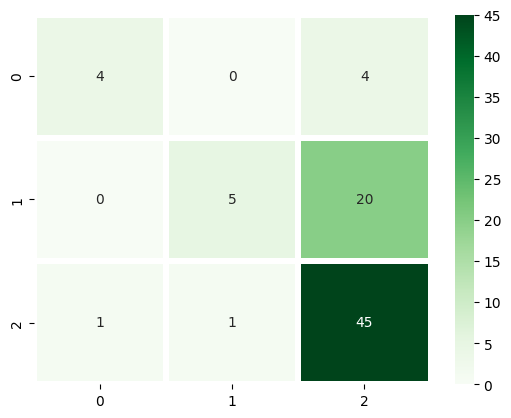

In [100]:
classnames = ['0','1','2']
sns.heatmap(confusion_matrix(y_test_comp_1, comp_pred_2),annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Greens",linewidths=3)
print(classification_report(y_test_comp_1,comp_pred_2))

### ***Feature Selection Technique after evaluation of scores*** ###

In [101]:
# split into input (X) and output (y) variables
fs_comp_x = comp_data.iloc[:, :-1]
fs_comp_y=  comp_data.Sales_Categorized_n

In [102]:
# Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [103]:
# Feature extraction
test_comp_feat = SelectKBest(score_func=chi2, k=4)
fit_comp_feat = test_comp_feat.fit(fs_comp_x, fs_comp_y)

In [104]:
# summarize scores
scores_comp_feat = fit_comp_feat.scores_
features_comp = fit_comp_feat.transform(fs_comp_x)

In [105]:
score_comp_feat_df = pd.DataFrame(list(zip(scores_comp_feat, fs_comp_x.columns)), columns =['Score', 'Feature'])
score_comp_feat_df.sort_values(by="Score", ascending=False, inplace=True)
score_comp_feat_df

Score      Feature
4  252.311197        Price
2  134.627835  Advertising
5   92.047690          Age
1   54.364054       Income
3   23.495660   Population
7   18.387028  ShelveLoc_n
9    3.471631         US_n
0    2.738224    CompPrice
6    0.313667    Education
8    0.142602      Urban_n

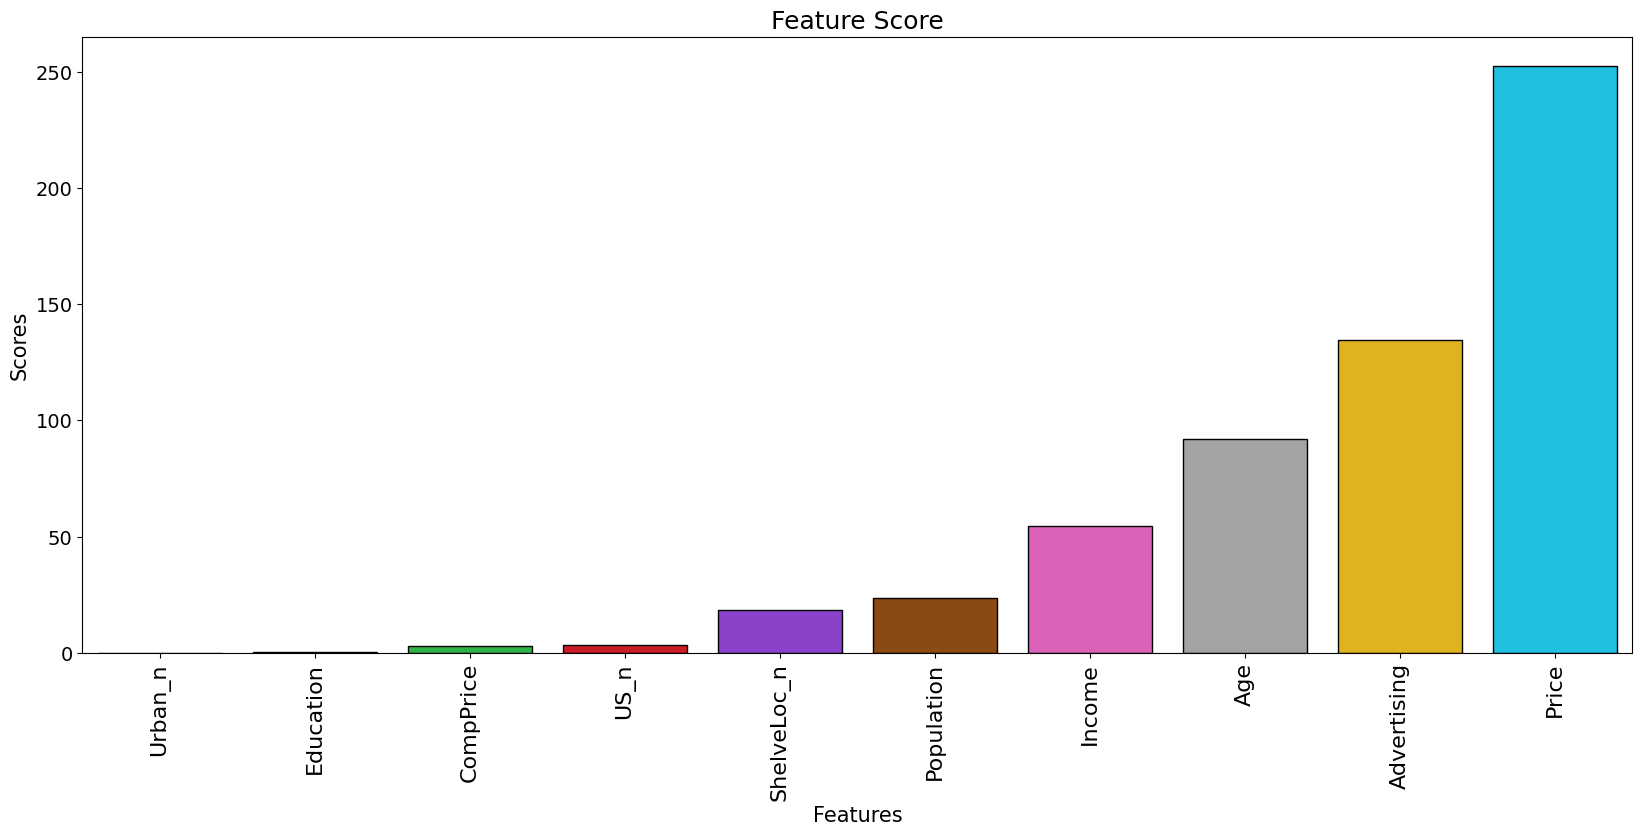

In [106]:
# Creating a chart with the Feature Score

plt.figure(figsize=(20,8))
# make barplot and sort bars
palette_color = sns.color_palette('bright')
sns.barplot(x='Feature', y="Score", data=score_comp_feat_df, order=score_comp_feat_df.sort_values('Score').Feature, palette=palette_color, edgecolor="#000000", linewidth=1,)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score", size=18)
plt.show()

In [107]:
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [108]:
# Creating a new 'inputs_comp_red' dataframe by reducing the dimensions that don't give much value
inputs_comp_red = comp_data.drop(['Sales_Categorized_n','Urban_n','Education','CompPrice','US_n' ], axis = 'columns')
inputs_comp_red

Income  Advertising  Population  Price  Age  ShelveLoc_n
0        73           11         276    120   42            0
1        48           16         260     83   65            1
2        35           10         269     80   59            2
3       100            4         466     97   55            2
4        64            3         340    128   38            0
..      ...          ...         ...    ...  ...          ...
395     108           17         203    128   33            1
396      23            3          37    120   55            2
397      26           12         368    159   40            2
398      79            7         284     95   50            0
399      37            0          27    120   49            1

[400 rows x 6 columns]

In [109]:
target_comp_red = comp_data.Sales_Categorized_n
target_comp_red

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_Categorized_n, Length: 400, dtype: int32

### ***Categorizing Training and Testing Sets*** ###

In [110]:
# Splitting x and y into training and testing sets

from sklearn.model_selection import train_test_split
x_train_comp_r, x_test_comp_r, y_train_comp_r, y_test_comp_r = train_test_split(inputs_comp_red, target_comp_red, test_size=0.3)

In [111]:
inputs_comp_red

Income  Advertising  Population  Price  Age  ShelveLoc_n
0        73           11         276    120   42            0
1        48           16         260     83   65            1
2        35           10         269     80   59            2
3       100            4         466     97   55            2
4        64            3         340    128   38            0
..      ...          ...         ...    ...  ...          ...
395     108           17         203    128   33            1
396      23            3          37    120   55            2
397      26           12         368    159   40            2
398      79            7         284     95   50            0
399      37            0          27    120   49            1

[400 rows x 6 columns]

In [112]:
inputs_comp_red

Income  Advertising  Population  Price  Age  ShelveLoc_n
0        73           11         276    120   42            0
1        48           16         260     83   65            1
2        35           10         269     80   59            2
3       100            4         466     97   55            2
4        64            3         340    128   38            0
..      ...          ...         ...    ...  ...          ...
395     108           17         203    128   33            1
396      23            3          37    120   55            2
397      26           12         368    159   40            2
398      79            7         284     95   50            0
399      37            0          27    120   49            1

[400 rows x 6 columns]

### **Building the Decision Tree Classifier using Gini Criteria** ###

In [113]:
comp_model_r = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
comp_model_r.fit(x_train_comp_r,y_train_comp_r)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[5] <= 0.5\ngini = 0.549\nsamples = 280\nvalue = [38, 73, 169]'),
 Text(0.25, 0.625, 'x[3] <= 102.5\ngini = 0.513\nsamples = 70\nvalue = [2, 40, 28]'),
 Text(0.125, 0.375, 'x[4] <= 70.0\ngini = 0.448\nsamples = 24\nvalue = [2, 5, 17]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [2, 1, 13]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.375, 0.375, 'x[4] <= 60.0\ngini = 0.364\nsamples = 46\nvalue = [0, 35, 11]'),
 Text(0.3125, 0.125, 'gini = 0.464\nsamples = 30\nvalue = [0, 19, 11]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0]'),
 Text(0.75, 0.625, 'x[3] <= 89.5\ngini = 0.495\nsamples = 210\nvalue = [36, 33, 141]'),
 Text(0.625, 0.375, 'x[4] <= 55.5\ngini = 0.434\nsamples = 22\nvalue = [15, 0, 7]'),
 Text(0.5625, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [11, 0, 1]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [4, 0, 6]'),
 Text(0.875, 0.375, 'x[5] <= 1.5\ngini = 0.449\nsamples = 18

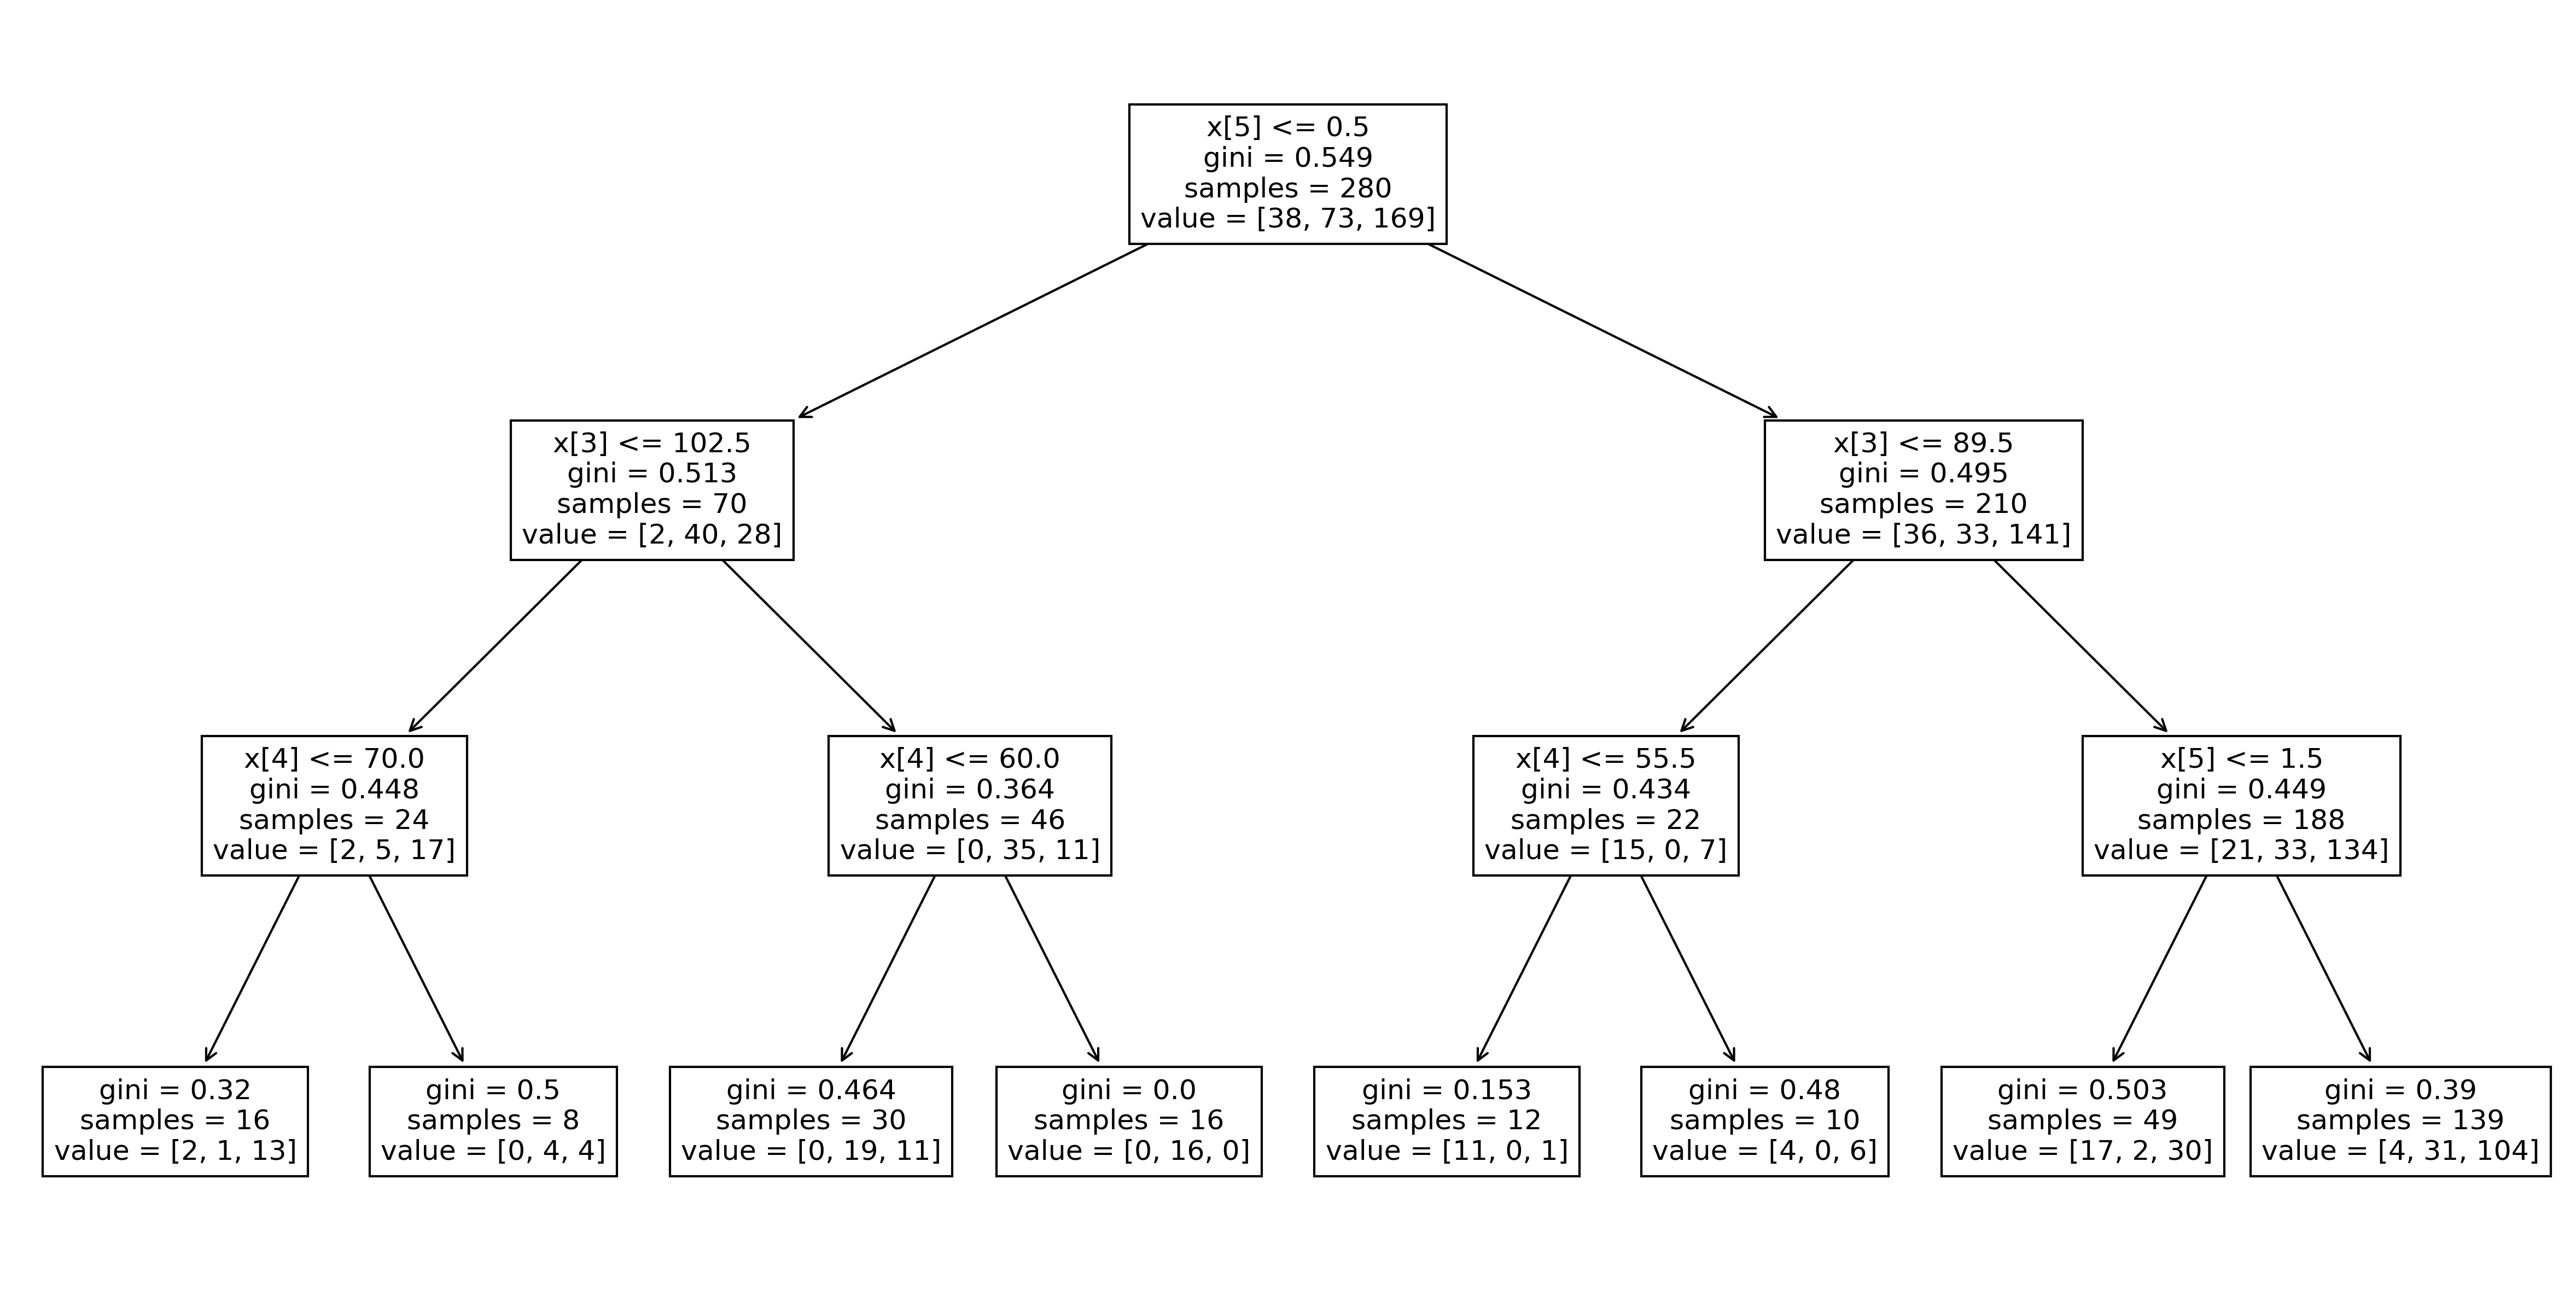

In [114]:
# Plot the decision tree

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(comp_model_r)

In [115]:
y_train_comp_r.value_counts()

Sales_Categorized_n
2    169
1     73
0     38
Name: count, dtype: int64

[Text(0.5, 0.875, 'Education <= 0.5\ngini = 0.549\nsamples = 280\nvalue = [38, 73, 169]\nclass = High'),
 Text(0.25, 0.625, 'Price <= 102.5\ngini = 0.513\nsamples = 70\nvalue = [2, 40, 28]\nclass = Medium'),
 Text(0.125, 0.375, 'Age <= 70.0\ngini = 0.448\nsamples = 24\nvalue = [2, 5, 17]\nclass = High'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [2, 1, 13]\nclass = High'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Medium'),
 Text(0.375, 0.375, 'Age <= 60.0\ngini = 0.364\nsamples = 46\nvalue = [0, 35, 11]\nclass = Medium'),
 Text(0.3125, 0.125, 'gini = 0.464\nsamples = 30\nvalue = [0, 19, 11]\nclass = Medium'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0]\nclass = Medium'),
 Text(0.75, 0.625, 'Price <= 89.5\ngini = 0.495\nsamples = 210\nvalue = [36, 33, 141]\nclass = High'),
 Text(0.625, 0.375, 'Age <= 55.5\ngini = 0.434\nsamples = 22\nvalue = [15, 0, 7]\nclass = Low'),
 Text(0.5625, 0.125, 'gini = 0.153\nsamples = 12\

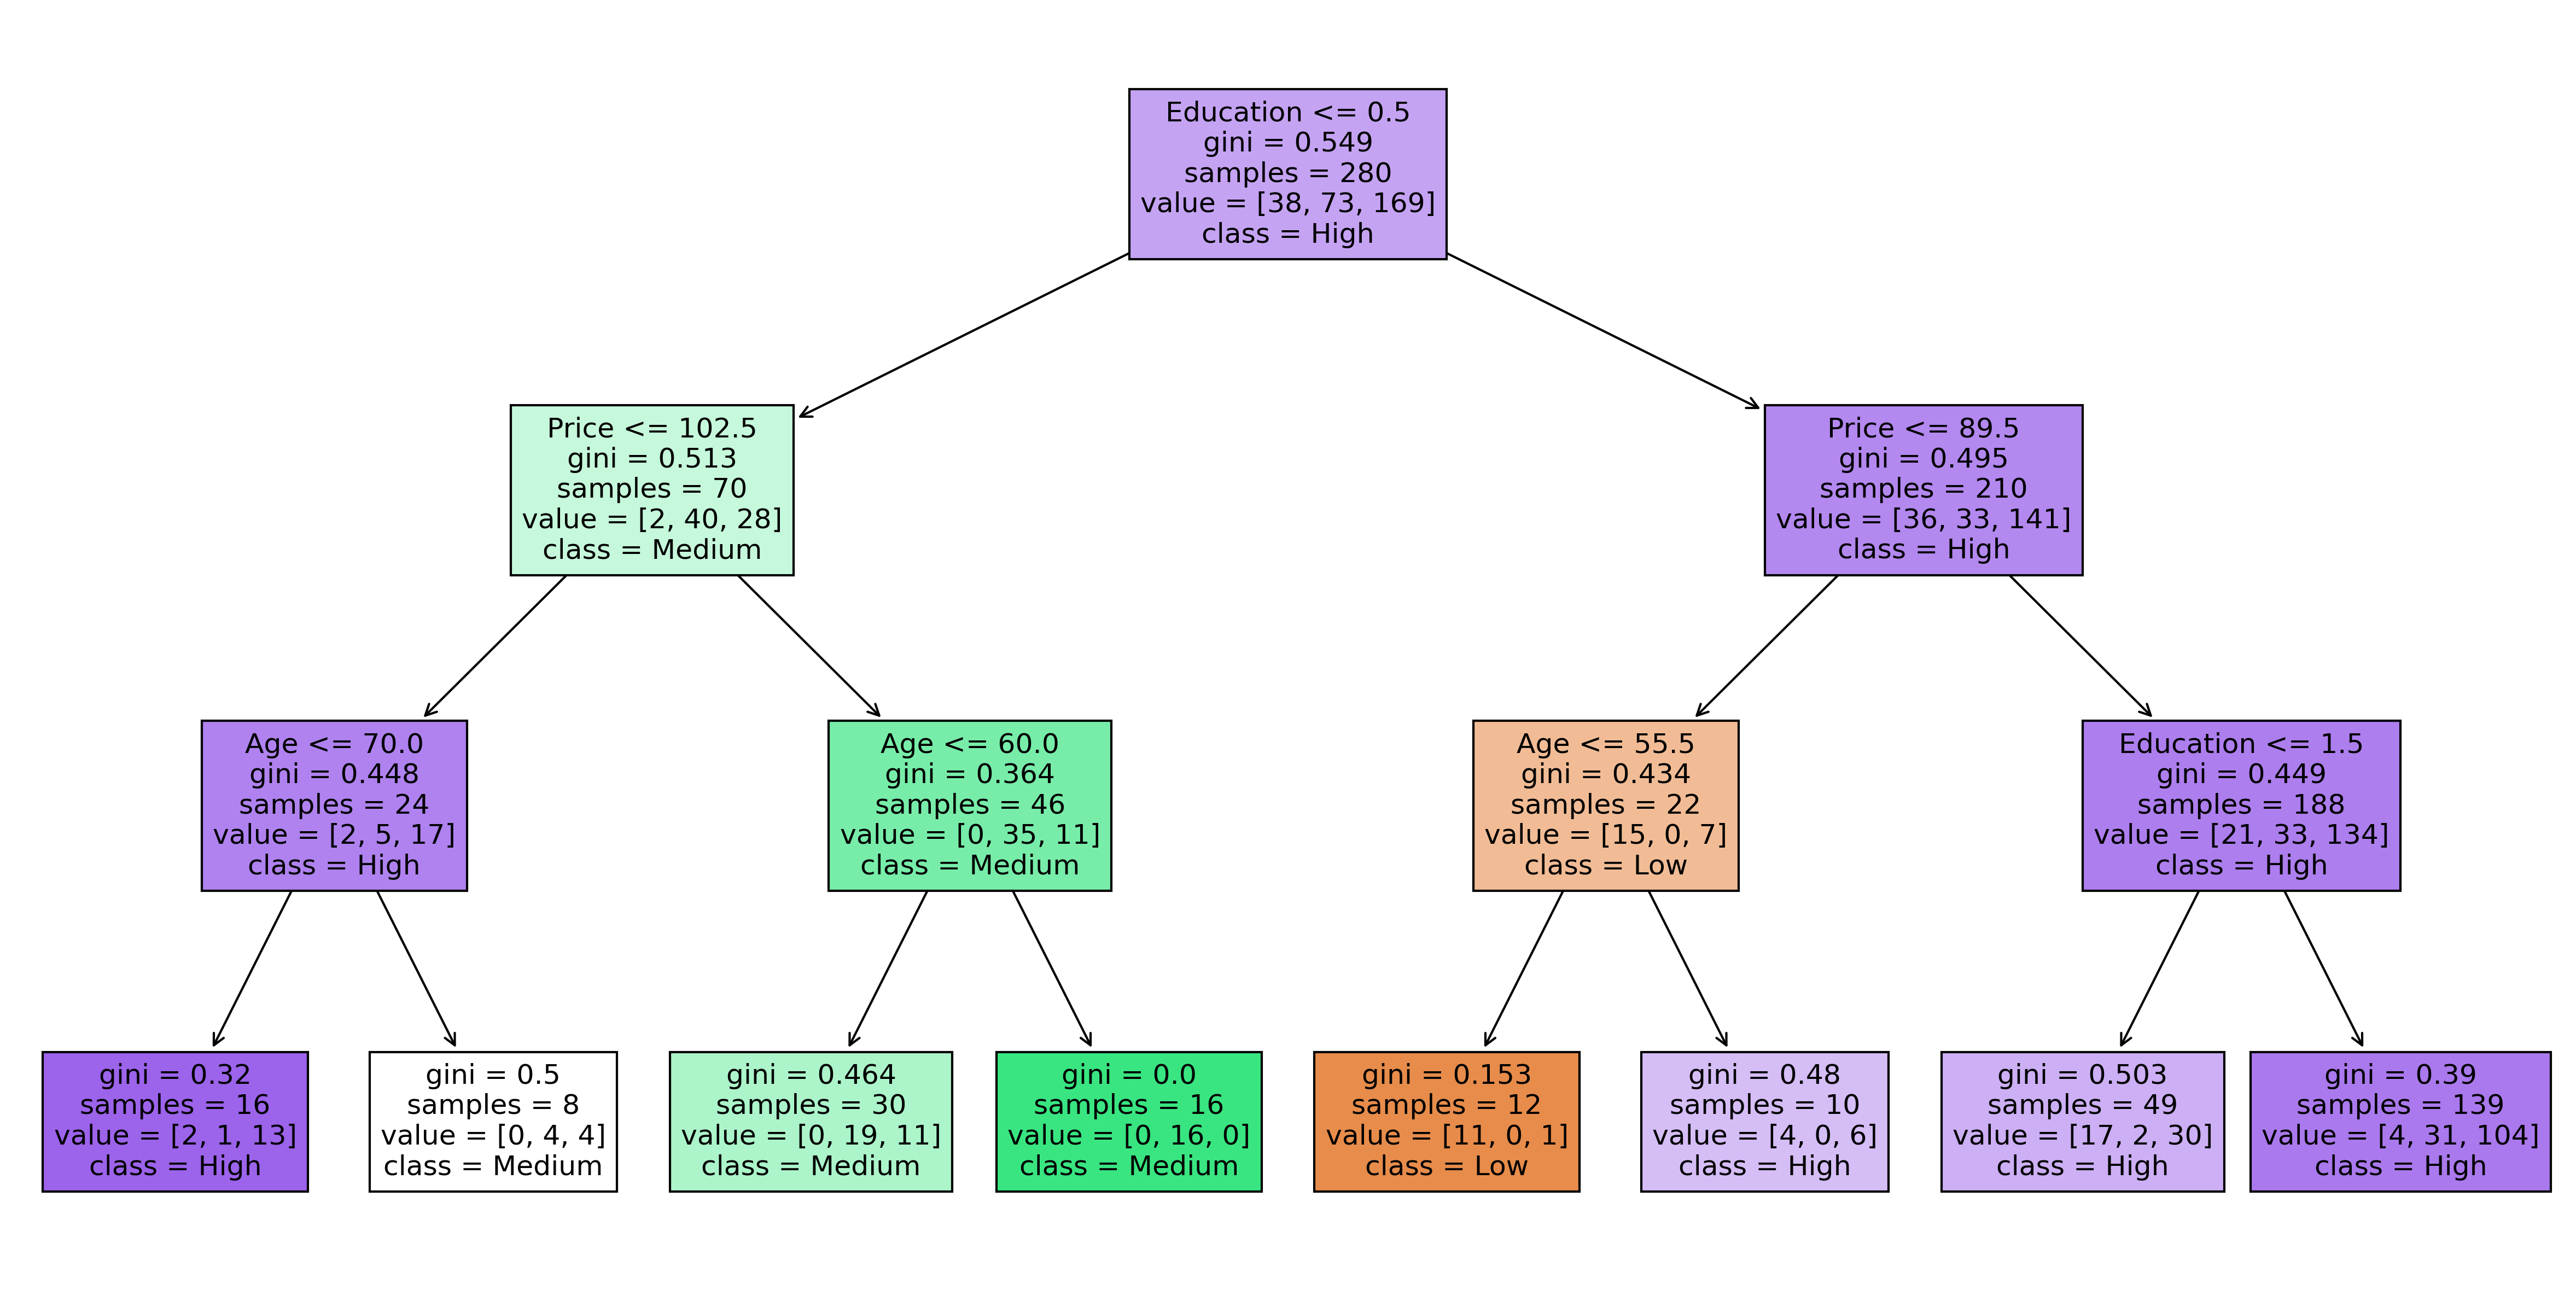

In [116]:
fn=['Income','Advertising','Population','Price','Age','Education','ShelveLoc_n']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(comp_model_r, feature_names = fn, class_names=cn, filled = True)

In [117]:
# Predicting on test data
comp_pred_r = comp_model_r.predict(x_test_comp_r) # predicting on test data set
pd.Series(comp_pred_r).value_counts() # getting the count of each category

2    95
1    19
0     6
Name: count, dtype: int64

In [118]:
print_score(comp_model_r, x_train_comp_r, y_train_comp_r, x_test_comp_r, y_test_comp_r, train=True)
print_score(comp_model_r, x_train_comp_r, y_train_comp_r, x_test_comp_r, y_test_comp_r, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 72.50%

____________________________________________________________________

ROC_AUC: 81.31%

____________________________________________________________________

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.916667   0.722222    0.714953     0.725    0.784614   
recall      0.289474   0.534247    0.905325     0.725    0.576349   
f1-score    0.440000   0.614173    0.798956     0.725    0.617710   
support    38.000000  73.000000  169.000000     0.725  280.000000   

           weighted avg  
precision      0.744224  
recall         0.725000  
f1-score       0.702065  
support      280.000000  

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 11   0  27]
 [  0  39  34]
 [  1  15 153]]


*********************************

In [119]:
comp_pred_r

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
pd.crosstab(y_test_comp_r,comp_pred_r) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0                0   1   2
Sales_Categorized_n           
0                    2   0  11
1                    0  12  17
2                    4   7  67

In [121]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_r = metrics.accuracy_score(y_train_comp_r, comp_model_r.predict(x_train_comp_r))
testing_acc_r = metrics.accuracy_score(y_test_comp_r, comp_model_r.predict(x_test_comp_r))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_r}\nTesting Accuracy: {testing_acc_r}")

Accuracy using metrics-
Training Accuracy: 0.725
Testing Accuracy: 0.675


In [122]:
# Checking accuracy by comparing metrics method
from sklearn import metrics
accuracy_pred_r = metrics.accuracy_score(y_test_comp_r,comp_pred_r)
print("Accuracy using metrics:", accuracy_pred_r)

Accuracy using metrics: 0.675


In [123]:
# Calculating the accuracy using numpy mean
accuracy_pred_r = np.mean(comp_pred_r==y_test_comp_r)
print(f"The accuracy using numpy mean is {accuracy_pred_r}")

The accuracy using numpy mean is 0.675


In [124]:
# Checking accuracy using alternate method
accuracy_pred_r = comp_model_r.score(x_test_comp_r, y_test_comp_r)
print("Accuracy using alternate method:", accuracy_pred_r)

Accuracy using alternate method: 0.675


In [125]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_r = metrics.accuracy_score(y_train_comp_r, comp_model_r.predict(x_train_comp_r))
testing_acc_r = metrics.accuracy_score(y_test_comp_r, comp_model_r.predict(x_test_comp_r))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_r}\nTesting Accuracy: {testing_acc_r}")

Accuracy using metrics-
Training Accuracy: 0.725
Testing Accuracy: 0.675


**Accuracy using metrics and Gini Impurity-**
- Training Accuracy using Gini impurity: 0.7642857142857142
- Testing Accuracy using Gini impurity: 0.6166666666666667

In [126]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc_r = metrics.roc_auc_score(y_test_comp_r, comp_model_r.predict_proba(x_test_comp_r), multi_class='ovr')
print(f"The ROC_AUC value is {roc_auc_r}")

The ROC_AUC value is 0.7368659243860662


              precision    recall  f1-score   support

           0       0.33      0.15      0.21        13
           1       0.63      0.41      0.50        29
           2       0.71      0.86      0.77        78

    accuracy                           0.68       120
   macro avg       0.56      0.48      0.50       120
weighted avg       0.65      0.68      0.65       120



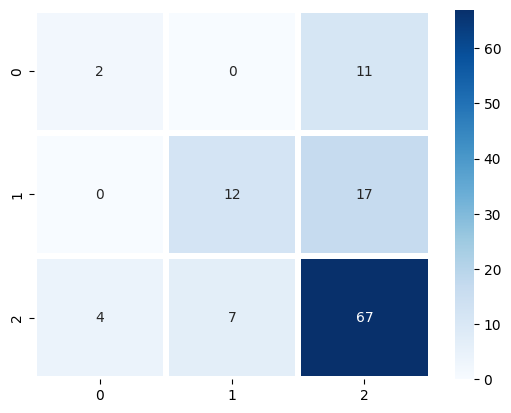

In [127]:
classnames = ['0','1','2']
sns.heatmap(confusion_matrix(y_test_comp_r,comp_pred_r),annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Blues",linewidths=3)
print(classification_report(y_test_comp_r,comp_pred_r))

### **Building Decision Tree Classifier (CART) using Entropy Criteria** ###

In [128]:
from sklearn.tree import DecisionTreeClassifier
comp_model_5 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [129]:
comp_model_5.fit(x_train_comp_r, y_train_comp_r)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [130]:
# Predicting on test data
comp_pred_5 = comp_model_5.predict(x_test_comp_r) # predicting on test data set
pd.Series(comp_pred_5).value_counts() # getting the count of each category

2    97
1    19
0     4
Name: count, dtype: int64

In [131]:
print_score(comp_model_5, x_train_comp_r, y_train_comp_r, x_test_comp_r, y_test_comp_r, train=True)
print_score(comp_model_5, x_train_comp_r, y_train_comp_r, x_test_comp_r, y_test_comp_r, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 73.21%

____________________________________________________________________

ROC_AUC: 82.41%

____________________________________________________________________

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.875000   0.722222    0.723810  0.732143    0.773677   
recall      0.368421   0.534247    0.899408  0.732143    0.600692   
f1-score    0.518519   0.614173    0.802111  0.732143    0.644934   
support    38.000000  73.000000  169.000000  0.732143  280.000000   

           weighted avg  
precision      0.743914  
recall         0.732143  
f1-score       0.714625  
support      280.000000  

____________________________________________________________________

CONFUSION MATRIX: 
 [[ 14   0  24]
 [  0  39  34]
 [  2  15 152]]


*********************************

In [132]:
# Checking accuracy using alternate method
accuracy_pred_5 = comp_model_5.score(x_test_comp_r, y_test_comp_r)
print("Accuracy using alternate method:", accuracy_pred_5)

Accuracy using alternate method: 0.7083333333333334


In [133]:
# Checking accuracy by comparing metrics method
from sklearn import metrics
accuracy_pred_5 = metrics.accuracy_score(y_test_comp_r,comp_pred_5)
print("Accuracy using metrics:", accuracy_pred_5)

Accuracy using metrics: 0.7083333333333334


In [134]:
# Calculating the accuracy using numpy mean
comp_pred_r=comp_model_5.predict(x_test_comp_r)
accuracy_pred_r = np.mean(comp_pred_r==y_test_comp_r)
print(f"The accuracy using numpy mean is {accuracy_pred_r}")

The accuracy using numpy mean is 0.7083333333333334


In [135]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_r = metrics.accuracy_score(y_train_comp_r, comp_model_5.predict(x_train_comp_r))
testing_acc_r = metrics.accuracy_score(y_test_comp_r, comp_model_5.predict(x_test_comp_r))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_r}\nTesting Accuracy: {testing_acc_r}")

Accuracy using metrics-
Training Accuracy: 0.7321428571428571
Testing Accuracy: 0.7083333333333334


              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.63      0.41      0.50        29
           2       0.72      0.90      0.80        78

    accuracy                           0.71       120
   macro avg       0.70      0.51      0.55       120
weighted avg       0.70      0.71      0.68       120



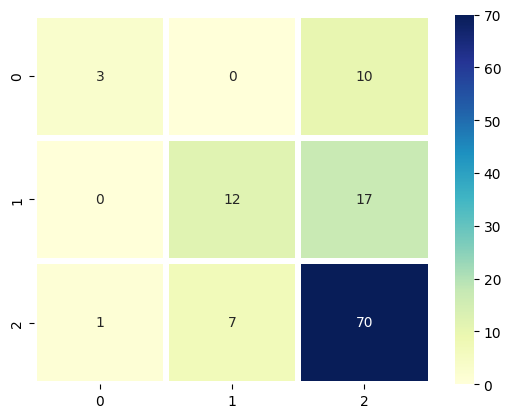

In [136]:
classnames = ['0','1','2']
sns.heatmap(confusion_matrix(y_test_comp_r, comp_pred_5),annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="YlGnBu",linewidths=3)
print(classification_report(y_test_comp_r, comp_pred_5))

##### **INFERENCE:** #####

- By only considering the features i.e. columns that give the highest score and ignoring the others in the model creation, we are able to improve the score
- Entropy is giving better accuracy when compared to Gini

### **FUNCTION TO GET ALL THE NECESSARY METRICS** ###

#### *Function to get - confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided* #### 

In [137]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test), multi_class='ovr')
    print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

### **PREDICTIONS BASED ON DIFFERENT MODELS** ###

In [138]:
# The initial model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction = comp_model.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on model are: {prediction[0], prediction[1], prediction[2]}")

# Note: This prediction is **not correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on model are: (0, 1, 2)


In [139]:
# The first model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_1 = comp_model_1.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on model are: {prediction_1[0], prediction_1[1], prediction_1[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on model are: (0, 1, 2)


In [140]:
# The second model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_2 = comp_model_2.predict([['111','48','16','260','83','65','10','1','1','1'],['141','64','3','340','128','38','13','0','1','0'],['113','35','10','269','80','59','12','2','1','1']])
print(f"The predication based on model are: {prediction_2[0], prediction_2[1], prediction_2[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on model are: (0, 1, 2)


In [141]:
# The revised model created takes into consideration 6 features/colums (after removal of insignificant ones) for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_r = comp_model_r.predict([['48','16','260','83','65','1'],['64','3','340','128','38','0'],['35','10','269','80','59','2']])
print(f"The predication based on model are: {prediction_r[0], prediction_r[1], prediction_r[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on model are: (2, 1, 2)


In [142]:
# The revised model_5 created takes into consideration 6 features/colums (after removal of insignificant ones) for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction_5 = comp_model_5.predict([['48','16','260','83','65','1'],['64','3','340','128','38','0'],['35','10','269','80','59','2']])
print(f"The predication based on model are: {prediction_5[0], prediction_5[1], prediction_5[2]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4 and 2 respectively.

The predication based on model are: (0, 1, 2)


### **Balancing the Data** ###

In [143]:
comp_data

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_n  Urban_n  US_n  Sales_Categorized_n  
0              0        1     1                    2  
1              1        1     1                    0  
2              2        1     1                    2  
3              2        1     1                    2  
4              0        1     0                    1  
..           ...      ...   ...                  ...  
395            1        1     1                    0  
396            2        0     1                    2  
397            2        1     1                    2  
398            0        1     1                    2  
399            1        1     1                    2  

[400 rows x 11 columns]

In [144]:
comp_data.Sales_Categorized_n.value_counts()

Sales_Categorized_n
2    247
1    102
0     51
Name: count, dtype: int64

In [145]:
inputs_c = comp_data.iloc[:,0:10]
target_c = comp_data.iloc[:,10]

In [146]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# output will be 4 dataframes: x_train_c, x_test_c, y_train_c and y_test_c

from sklearn.model_selection import train_test_split
x_train_c, x_test_c,y_train_c,y_test_c = train_test_split(inputs_c, target_c, test_size=0.2)

In [147]:
target_c.value_counts()
# The counts are imbalanced for the total count of 400 records.

Sales_Categorized_n
2    247
1    102
0     51
Name: count, dtype: int64

In [148]:
y_train_c.value_counts()
# The counts are imbalanced for the training count of 320 records, which is 80% of the total 200 records.
# We see that the "Medium: 2" has the highest count with 204, "Low: 0" has the secound highest count with 77
# and "High: 0" has the lowest count with 39

Sales_Categorized_n
2    188
1     90
0     42
Name: count, dtype: int64

### **SMOTE: Synthetic Minority Oversampling Technique** ###

In [149]:
# Using SMOTE to balance the data using Oversampling technique. 

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train_c)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train_c, y_train_c)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 188, 1: 90, 0: 42})
After Counter({1: 188, 2: 188, 0: 188})


In [150]:
y_train_sm.value_counts()
# After applying SMOTE, the counts have balanced for the training count of 320 records, which is 80% of the total 200 records.
# We now see that "Medium: 2", "Low: 0" and "High: 0", all have the same count of records i.e., 204

Sales_Categorized_n
1    188
2    188
0    188
Name: count, dtype: int64

### **ADASYN: Adaptive Synthetic Sampling Approach** ###

In [151]:
# Using ADASYN to balance the data using Oversampling technique. 
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train_c)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train_c, y_train_c)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 188, 1: 90, 0: 42})
After Counter({2: 188, 1: 186, 0: 183})


In [152]:
# Getting the necessary details i.e., confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': [10]
        }
        
    }
}

sampled_data = {
    'ACTUAL':[x_train_c, y_train_c],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada]
}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        
        print("\n\n",' '*10, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test_c, y_test_c, model, resam))



            USING DECISION_TREE WITH ACTUAL
____________________________________________________________
____________________________________________________________

CONFUSION MATRIX
[[ 2  0  7]
 [ 0  6  6]
 [ 4 14 41]]
____________________________________________________________

ACCURACY: 0.6125

ROC_AUC: 0.6789663635407214

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.22      0.27         9
           1       0.30      0.50      0.37        12
           2       0.76      0.69      0.73        59

    accuracy                           0.61        80
   macro avg       0.46      0.47      0.46        80
weighted avg       0.64      0.61      0.62        80

------------------------------------------------------------
____________________________________________________________


            USING 